# 1.Load Modules and Data


In [435]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Load input data

In [436]:
#create file path, connect to database, retrieve table name
dbfile = 'data/failure.db'
con = sqlite3.connect(dbfile)
table = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", con)['name']
print(table)

0    failure
Name: name, dtype: object


In [437]:
#Table name 'failure' has been retrieved. Proceeding to convert database to DataFrame format.
df = pd.read_sql_query("SELECT * FROM {}".format(table[0]), con)
df.head()

,Car ID,Model,Color,Temperature,RPM,Factory,Usage,Fuel consumption,Membership,Failure A,Failure B,Failure C,Failure D,Failure E
0,137b948a-c99f-4afa-a2a7-9ef65ae51e8f,"Model 5, 2022",Blue,110.3 °C,1551,"Shang Hai, China",Medium,659.7,Normal,0,0,0,0,0
1,3395a182-7e76-4fb3-94ba-5163d8f4e6b0,"Model 3, 2022",Black,110.4 °C,1408,"Shang Hai, China",Medium,705.3,Premium,1,0,0,0,0
2,8c6a8e5b-d869-4665-b739-819c9e4a2070,"Model 3, 2022",Grey,110.3 °C,1498,"Shang Hai, China",Low,670.7,Premium,0,0,0,0,0
3,ff864366-fe5e-409e-9b2f-8fe440d8cc5b,"Model 3, 2022",Black,110.4 °C,1433,"Berlin, Germany",High,630.6,Premium,1,0,0,0,0
4,10484506-1be0-4a86-8dbc-b8b2092b93b2,"Model 3, 2022",White,230.7 °C,1408,"New York, U.S",High,660.9,Normal,0,1,0,0,0


# 2. Initial Exploration

In [438]:
#Checking for number of entries and null/missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10081 entries, 0 to 10080
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Car ID            10081 non-null  object 
 1   Model             10081 non-null  object 
 2   Color             10081 non-null  object 
 3   Temperature       10081 non-null  object 
 4   RPM               10081 non-null  int64  
 5   Factory           10081 non-null  object 
 6   Usage             10081 non-null  object 
 7   Fuel consumption  10081 non-null  float64
 8   Membership        9697 non-null   object 
 9   Failure A         10081 non-null  int64  
 10  Failure B         10081 non-null  int64  
 11  Failure C         10081 non-null  int64  
 12  Failure D         10081 non-null  int64  
 13  Failure E         10081 non-null  int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 1.1+ MB


In [439]:
#Checking for duplicates
print(df.duplicated().sum())
df[df.duplicated()]

81


,Car ID,Model,Color,Temperature,RPM,Factory,Usage,Fuel consumption,Membership,Failure A,Failure B,Failure C,Failure D,Failure E
10000,fb6b1d49-ed23-42f2-8e39-292e568f517d,"Model 7, 2019",White,110.6 °C,1375,"Shang Hai, China",High,753.5,Normal,0,0,0,0,0
10001,db6a8f01-558c-4e77-b37a-0ba3a5e7bcb6,"Model 3, 2019",White,110.6 °C,1450,"Shang Hai, China",High,649.7,Normal,0,0,0,0,0
10002,357f7cf2-7b39-4602-96c5-9e33c755a3eb,"Model 5, 2019",White,110.6 °C,1581,"Berlin, Germany",Low,741.8,Normal,0,0,0,0,0
10003,7dd81267-294a-4cd2-9d35-0425bf1115f7,"Model 3, 2019",White,110.6 °C,1758,"Shang Hai, China",Medium,634.5,Normal,0,0,0,0,0
10004,4d69d500-7c92-403c-a7b8-ab3c2305d315,"Model 5, 2018",White,231.1 °F,1561,"New York, U.S",Low,675.5,Premium,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10076,64921ab7-c024-447a-8651-006a7e8a5e64,"Model 5, 2020",White,110.6 °C,1575,"Shang Hai, China",Low,728.5,Premium,0,0,0,0,0
10077,246aa846-094d-441a-814a-ecf64d4e3775,"Model 5, 2020",White,110.6 °C,1750,"Berlin, Germany",Low,698.9,Premium,0,0,0,0,0
10078,0b9c5542-e343-4b7e-a4c9-aad358dbe993,"Model 3, 2019",White,110.6 °C,1529,"Shang Hai, China",Low,651.5,Normal,0,0,0,0,0
10079,fd5ac6de-3afb-4ad8-b4a9-4bc47b34dd08,"Model 3, 2019",Blue,110.6 °C,1523,"Berlin, Germany",High,638.8,Premium,0,0,0,0,0


We should not be seeing any duplicates especially due to Car ID because it is unique to each car. Duplicates will be removed.

In [440]:
#Remove duplicates
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())
#Double check no instances where Car ID is duplicated with modified data
print(df['Car ID'].duplicated().sum())

0
0


There were 81 duplicates which were removed, bringing the database size to 10000, let's check the info again.

In [441]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Car ID            10000 non-null  object 
 1   Model             10000 non-null  object 
 2   Color             10000 non-null  object 
 3   Temperature       10000 non-null  object 
 4   RPM               10000 non-null  int64  
 5   Factory           10000 non-null  object 
 6   Usage             10000 non-null  object 
 7   Fuel consumption  10000 non-null  float64
 8   Membership        9617 non-null   object 
 9   Failure A         10000 non-null  int64  
 10  Failure B         10000 non-null  int64  
 11  Failure C         10000 non-null  int64  
 12  Failure D         10000 non-null  int64  
 13  Failure E         10000 non-null  int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 1.1+ MB


In [442]:
#Listing potential categorical features and their unique values
categories = ['Model','Color','Factory','Usage','Membership']
for i in categories:
    print(df[i].value_counts()) 

Model 3, 2016    586
Model 3, 2020    562
Model 3, 2021    560
Model 3, 2012    556
Model 3, 2014    552
Model 3, 2018    541
Model 3, 2019    532
Model 3, 2013    528
Model 3, 2015    526
Model 3, 2017    509
Model 3, 2022    315
Model 5, 2018    314
Model 5, 2020    306
Model 5, 2014    289
Model 5, 2016    288
Model 5, 2012    274
Model 5, 2017    267
Model 5, 2013    263
Model 5, 2015    247
Model 5, 2021    245
Model 5, 2019    244
Model 3, 2011    201
Model 5, 2022    170
Model 7, 2014    103
Model 7, 2016     97
Model 7, 2018     95
Model 7, 2020     94
Model 7, 2015     90
Model 7, 2019     90
Model 7, 2017     88
Model 7, 2012     86
Model 7, 2013     84
Model 7, 2021     84
Model 5, 2011     82
Model 7, 2022     60
Model 3, 2010     31
Model 7, 2011     27
Model 5, 2010      7
Model 7, 2010      5
Model 3, 2009      1
Model 5, 2009      1
Name: Model, dtype: int64
White    5568
Red      1159
Blue     1129
Grey     1086
Black    1058
Name: Color, dtype: int64
Shang Hai, China 

From here, we can see that only Membership has missing data, of which there are 383 missing entries out of 10000.
Looking at the features available:
The assumption is made that Car ID is independent of other factors. Categorisation is not possible as it is unique to each car. 

Categorical Features: Color, Factory
Ordering cannot be given to these features, hence Color and Factory as classified as Categorical Features.
For Factory there are a few entries where the country seems to be wrongly labelled and hence will have to be rectified.

Ordinal Features: Model, Usage, Membership
Car Models are categorised in order of increasing specifications from 3, 5 to 7. However, the inputs in the database also include year, hence some modification is required.
Usage ranges from Low to Medium to High in order.
There is None, Normal and Premium values for Membership, where the amount of car servicing provided varies. As mentioned previously, there are 384 missing entries for Membership. However, car owners are provided with Normal membership for the first five years since purchase, so this might fill some of the gaps.

Continuous Features: Temperature, RPM, Fuel consumption
Temperature column contains the degrees Celsius characters in the input and current type is object, hence some editing is required.
RPM and Fuel consumption are type int and float respectively.

Our objective is to predict the occurrence of car failure, hence the targets are Failure A, Failure B, Failure C, Failure D and Failure E. There is an opportunity here to combine the targets to a single column 'fail', to indicate whether any failure occurs.

In [443]:
#Combining the targets into Column 'fail'. Any failure returns 1, while no failure returns 0
df['fail'] = df.iloc[:,-5:].sum(axis=1)
df['fail'] = df['fail'].astype('bool').astype('int64')
print(df['fail'].head())

0    0
1    1
2    0
3    1
4    1
Name: fail, dtype: int64


# 3. Target and Feature Analysis

# Failure
First, let's take a look at our target, Failure.

<AxesSubplot:ylabel='fail'>

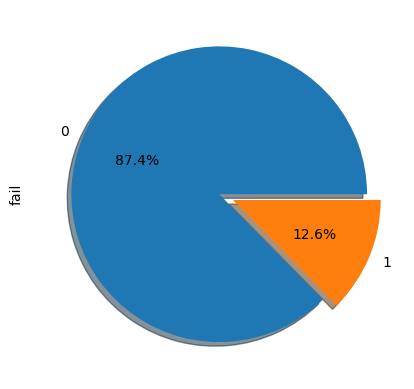

In [444]:
df['fail'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True)

{'Failure A': 259, 'Failure B': 185, 'Failure C': 310, 'Failure D': 244, 'Failure E': 264}


([<matplotlib.patches.Wedge at 0x2befc687100>,
 [Text(0.8791761051603653, 0.6610971003680552, 'Failure A'),
  Text(-0.19610460966003954, 1.082378391354005, 'Failure B'),
  Text(-1.0860689111730568, 0.17451166202684354, 'Failure C'),
  Text(-0.3782228555856857, -1.032931494104333, 'Failure D'),
  Text(0.8708795551884182, -0.671988690645031, 'Failure E')],
 [Text(0.47955060281474465, 0.36059841838257556, '20.5%'),
  Text(-0.10696615072365792, 0.5903882134658208, '14.7%'),
  Text(-0.5924012242762127, 0.0951881792873692, '24.6%'),
  Text(-0.20630337577401034, -0.5634171786023634, '19.3%'),
  Text(0.4750252119209553, -0.36653928580638045, '20.9%')])

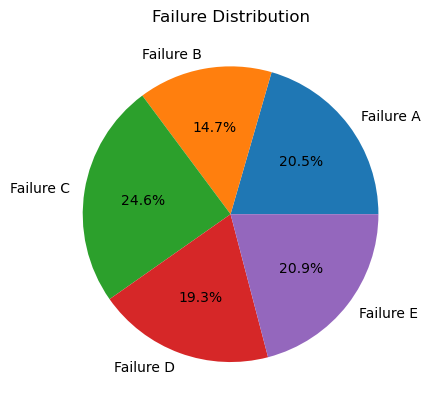

In [445]:
df_filtered = df[df['fail'] == 1]
counts = {}
# Count the occurrences of each variable
for col in ['Failure A','Failure B','Failure C','Failure D','Failure E']:
    counts[col] = df_filtered[col].sum()
print(counts)
plt.title('Failure Distribution')
plt.pie(counts.values(), labels=counts.keys(), autopct='%1.1f%%')

Text(0.5, 1.0, 'Failure Count Comparison')

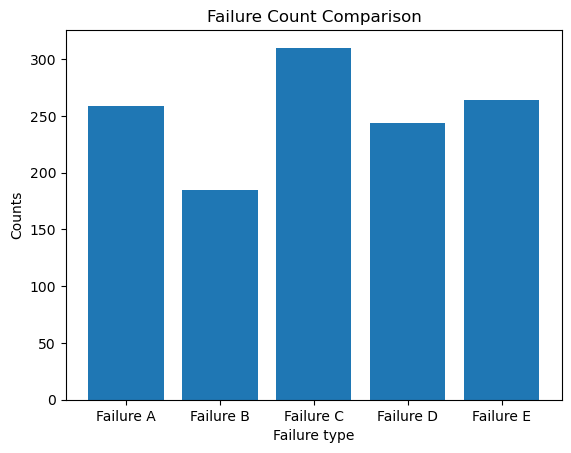

In [446]:
plt.bar(counts.keys(),counts.values())
plt.xlabel('Failure type')
plt.ylabel('Counts')
plt.title('Failure Count Comparison')

 We can see that 12.6% of the cars in the dataset encounter failure, which are spread out into 5 different types A, B, C, D, E. Failure C takes up the biggest proportion of failures at 310 counts, 24.6% of failures. Failure B is the least frequent at 185, 14.7% of failures. There are no failure types that are significantly more or less than the rest, hence there are no outliers.

# Color (Categorical)

In [447]:
df.groupby(['Color','fail'])['fail'].count()

Color  fail
Black  0        922
       1        136
Blue   0       1003
       1        126
Grey   0        936
       1        150
Red    0       1010
       1        149
White  0       4867
       1        701
Name: fail, dtype: int64

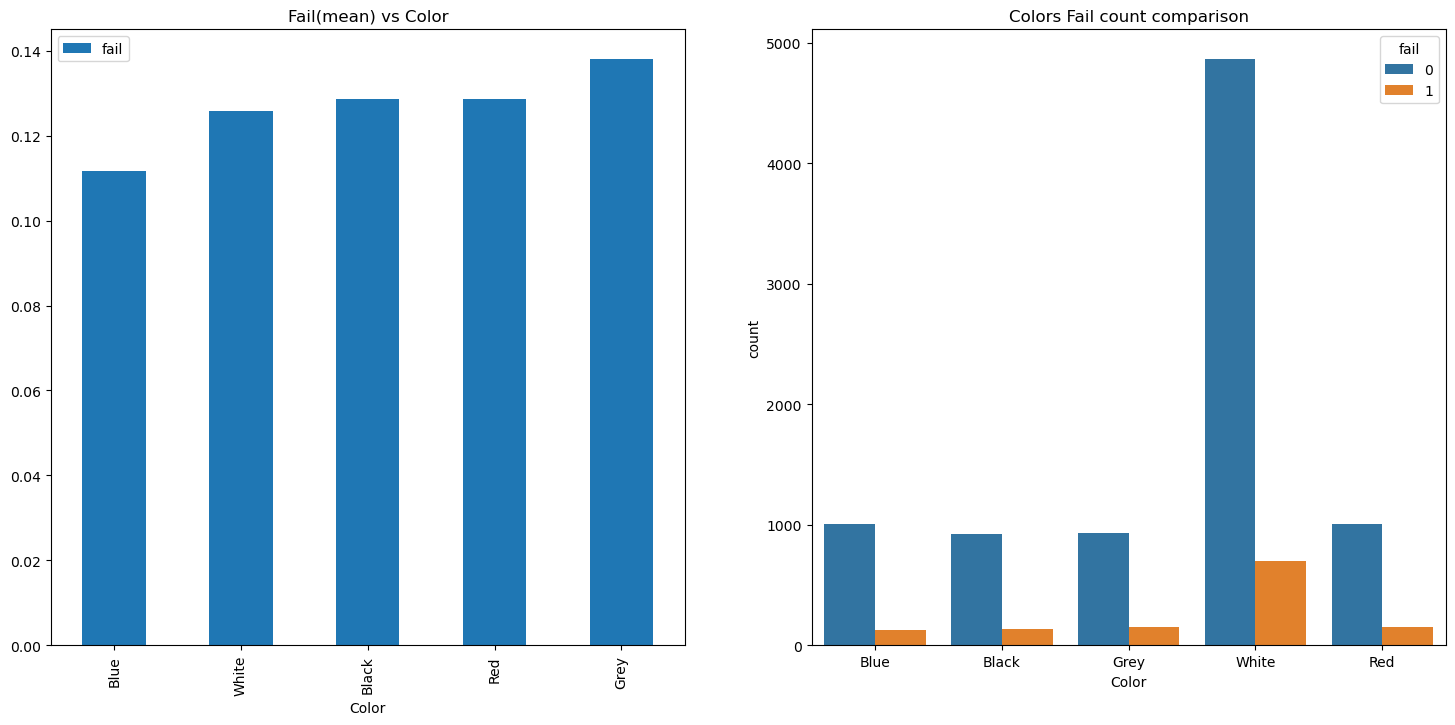

           fail
Color          
Blue   0.111603
White  0.125898
Black  0.128544
Red    0.128559
Grey   0.138122


In [448]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df[['Color','fail']].groupby(['Color']).mean().sort_values('fail').plot.bar(ax=ax[0])
ax[0].set_title('Fail(mean) vs Color')
sns.countplot(data=df, x='Color', hue='fail', ax=ax[1])
ax[1].set_title('Colors Fail count comparison')
plt.show()
print(df[['Color','fail']].groupby(['Color']).mean().sort_values('fail'))

From the above data, we can see that the number of white cars experiencing failure exceeds that of other colored cars by multiple times. However, this is due to the sheer volume of white cars. As shown in the mean chart, the proportion of failing white cars does not differ much from the other colored cars, in fact it has the second lowest failure rate. We can see from here that grey cars seem to have the highest failure rate and blue cars have the lowest.

# Factory (Categorical)
As mentioned previously, some of the inputted info appears to be incorrect, as Seng Kang, Newton and Bedok are not locations known to be in China and Germany, but rather in Singapore. Let's proceed to correct this information.

In [449]:
df.loc[(df.Factory == 'Seng Kang, China'),'Factory']= 'Seng Kang, Singapore'
df.loc[(df.Factory == 'Newton, China'),'Factory']= 'Newton, Singapore'
df.loc[(df.Factory == 'Bedok, Germany'),'Factory'] = 'Bedok, Singapore'
df.Factory.value_counts()

Shang Hai, China        5478
Berlin, Germany         2215
New York, U.S           2127
Seng Kang, Singapore     106
Newton, Singapore         44
Bedok, Singapore          30
Name: Factory, dtype: int64

In [450]:
df.groupby(['Factory','fail'])['fail'].count()

Factory               fail
Bedok, Singapore      1         30
Berlin, Germany       0       1964
                      1        251
New York, U.S         0       1895
                      1        232
Newton, Singapore     1         44
Seng Kang, Singapore  1        106
Shang Hai, China      0       4879
                      1        599
Name: fail, dtype: int64

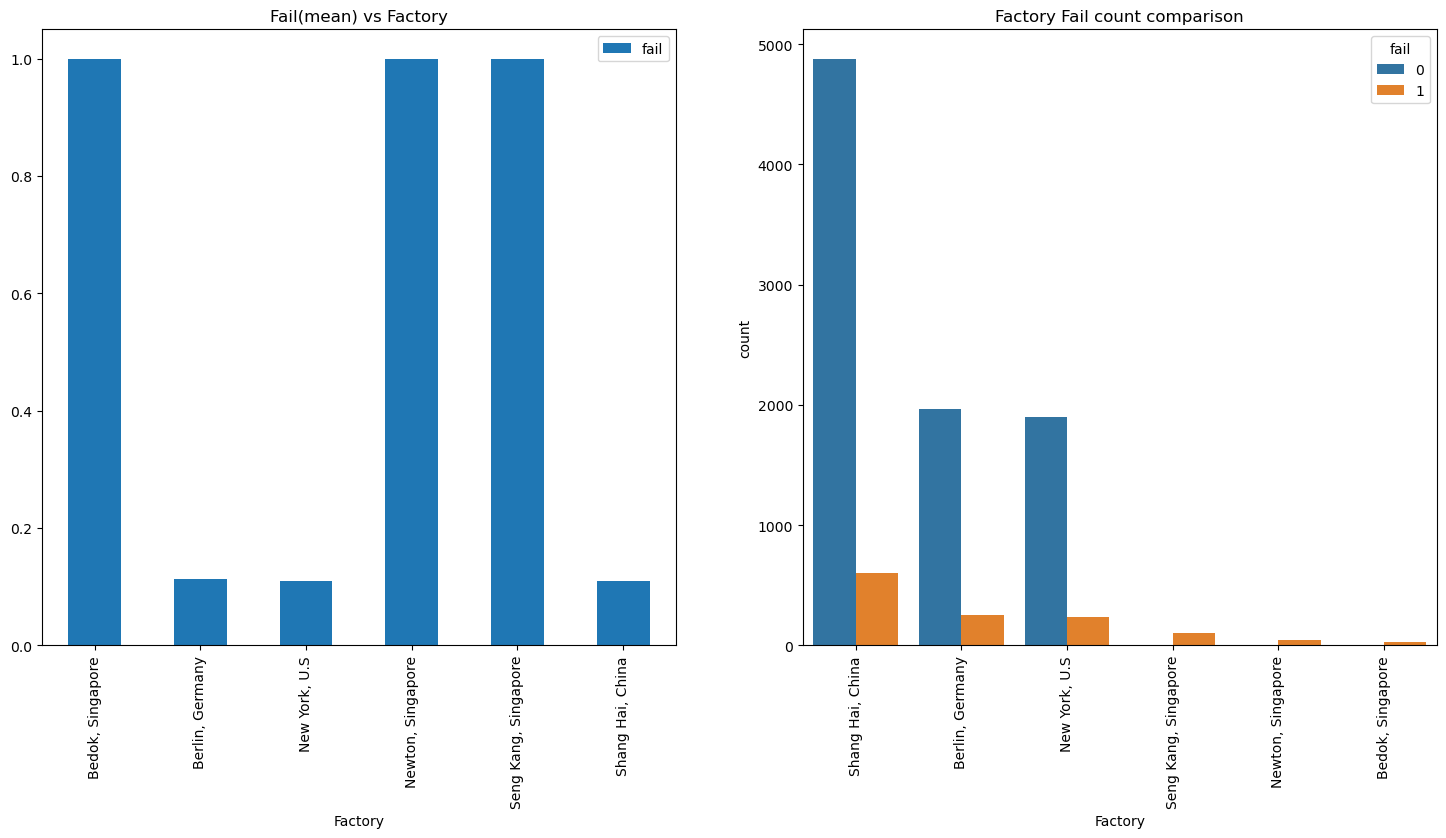

In [451]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df[['Factory','fail']].groupby(['Factory']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Fail(mean) vs Factory')
sns.countplot(x='Factory', hue='fail',data=df, ax=ax[1])
plt.xticks(rotation='vertical')
ax[1].set_title('Factory Fail count comparison')
plt.show()

From this feature we can extract another feature Country as well

In [452]:
df.loc[(df.Factory == 'Seng Kang, Singapore'), 'Country'] = 'Singapore'
df.loc[(df.Factory == 'Newton, Singapore'), 'Country'] = 'Singapore'
df.loc[(df.Factory == 'Bedok, Singapore'), 'Country'] = 'Singapore'
df.loc[(df.Factory == 'New York, U.S'), 'Country'] = 'U.S'
df.loc[(df.Factory == 'Berlin, Germany'), 'Country'] = 'Germany'
df.loc[(df.Factory == 'Shang Hai, China'), 'Country'] = 'China'
df.Country.value_counts()

China        5478
Germany      2215
U.S          2127
Singapore     180
Name: Country, dtype: int64

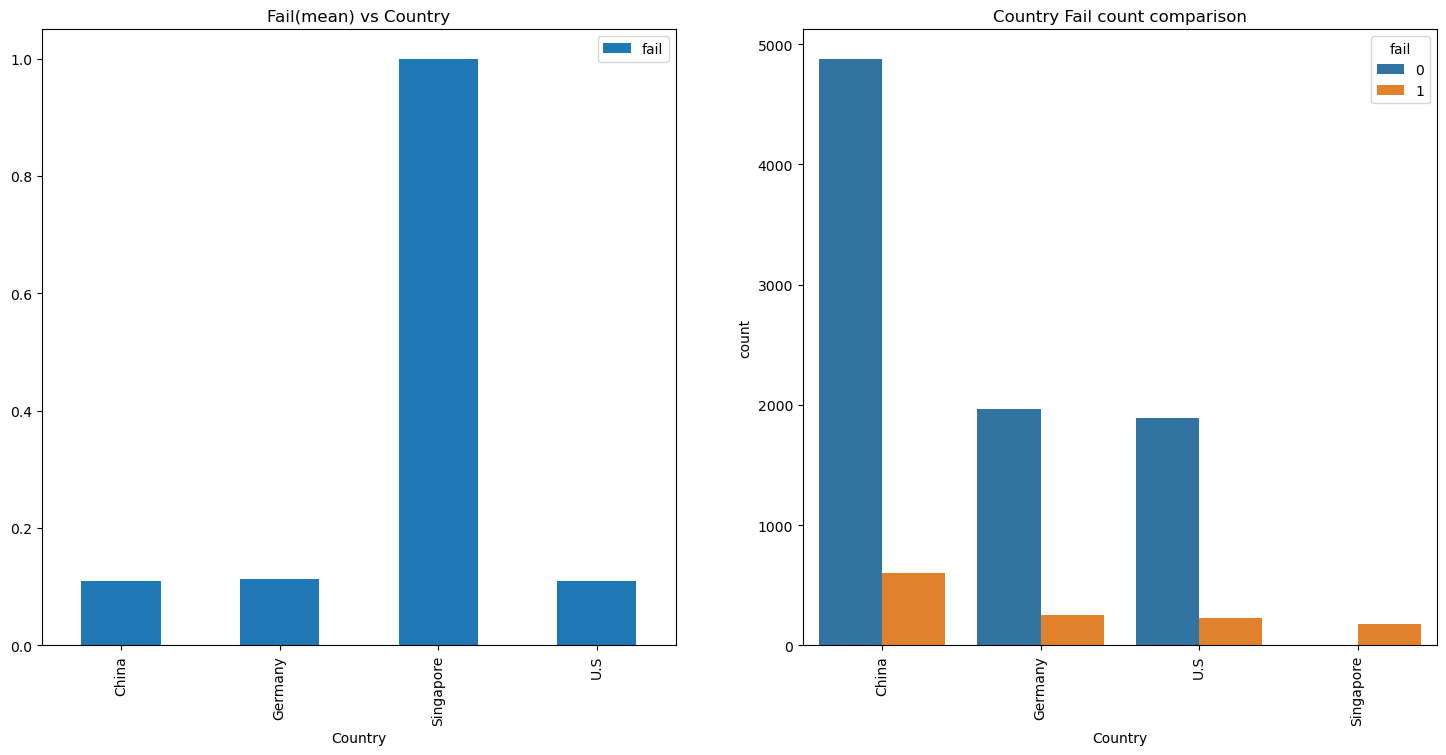

In [453]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df[['Country','fail']].groupby(['Country']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Fail(mean) vs Country')
sns.countplot(x='Country', hue='fail',data=df, ax=ax[1])
plt.xticks(rotation='vertical')
ax[1].set_title('Country Fail count comparison')
plt.show()

In [454]:
print(df[['Factory','fail']].groupby(['Factory']).mean())

                          fail
Factory                       
Bedok, Singapore      1.000000
Berlin, Germany       0.113318
New York, U.S         0.109074
Newton, Singapore     1.000000
Seng Kang, Singapore  1.000000
Shang Hai, China      0.109346


It seems highly unlikely that all cars made in Singapore had encountered failure, hence the assumption is made that the city was entered wrongly instead of the country. With this, the Factory locations should be edited accordingly, with entries labelled with 'Seng Kang/Bedok, China' to be changed to 'Shang Hai, China' while 'Bedok, Germany' is changed to 'Berlin, Germany'

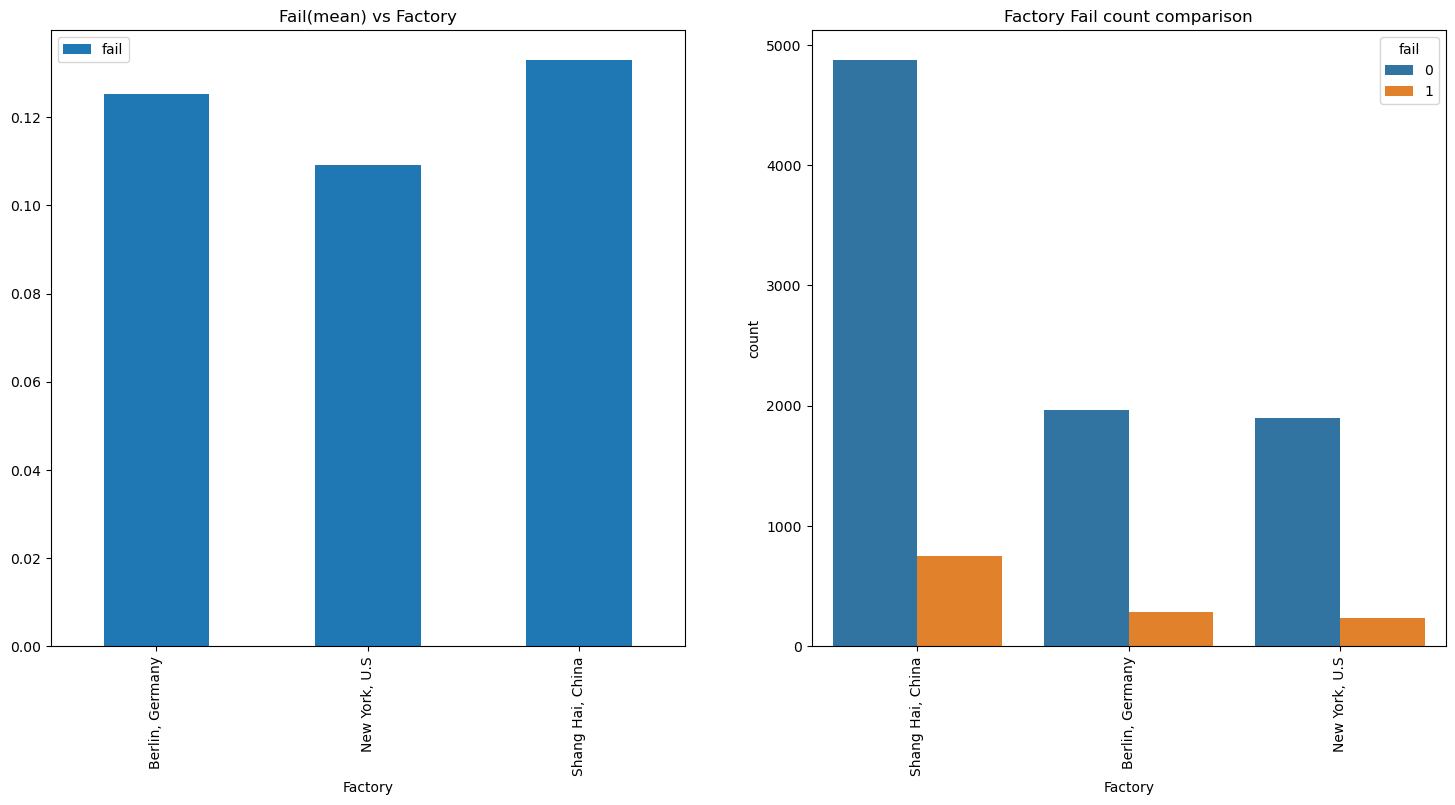

In [455]:
df.loc[(df.Factory == 'Seng Kang, Singapore'), 'Factory'] = 'Shang Hai, China'
df.loc[(df.Factory == 'Newton, Singapore'), 'Factory'] = 'Shang Hai, China'
df.loc[(df.Factory == 'Bedok, Singapore'), 'Factory'] = 'Berlin, Germany'
df.loc[(df.Factory == 'New York, U.S'), 'Country'] = 'U.S'
df.loc[(df.Factory == 'Berlin, Germany'), 'Country'] = 'Germany'
df.loc[(df.Factory == 'Shang Hai, China'), 'Country'] = 'China'
df.Factory.value_counts()

f,ax=plt.subplots(1,2,figsize=(18,8))
df[['Factory','fail']].groupby(['Factory']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Fail(mean) vs Factory')
sns.countplot(x='Factory', hue='fail',data=df, ax=ax[1])
plt.xticks(rotation='vertical')
ax[1].set_title('Factory Fail count comparison')
plt.show()

In [456]:
print(df[['Factory','fail']].groupby(['Factory']).mean())

                      fail
Factory                   
Berlin, Germany   0.125167
New York, U.S     0.109074
Shang Hai, China  0.133085


It can be seen that cars from Shang Hai have the highest failure rate at 13.3%, followed by Germany (12.5%) then US (10.9%).
If the Singapore entries were not converted but removed instead, then Germany would be the highest (11.3%), followed by China (10.93%) and U.S. (10.91%).
Also, since there is no longer any difference between Factory and Country columns, Country can be removed.

In [457]:
df = df.drop(columns=['Country'])
df.head()

,Car ID,Model,Color,Temperature,RPM,Factory,Usage,Fuel consumption,Membership,Failure A,Failure B,Failure C,Failure D,Failure E,fail
0,137b948a-c99f-4afa-a2a7-9ef65ae51e8f,"Model 5, 2022",Blue,110.3 °C,1551,"Shang Hai, China",Medium,659.7,Normal,0,0,0,0,0,0
1,3395a182-7e76-4fb3-94ba-5163d8f4e6b0,"Model 3, 2022",Black,110.4 °C,1408,"Shang Hai, China",Medium,705.3,Premium,1,0,0,0,0,1
2,8c6a8e5b-d869-4665-b739-819c9e4a2070,"Model 3, 2022",Grey,110.3 °C,1498,"Shang Hai, China",Low,670.7,Premium,0,0,0,0,0,0
3,ff864366-fe5e-409e-9b2f-8fe440d8cc5b,"Model 3, 2022",Black,110.4 °C,1433,"Berlin, Germany",High,630.6,Premium,1,0,0,0,0,1
4,10484506-1be0-4a86-8dbc-b8b2092b93b2,"Model 3, 2022",White,230.7 °C,1408,"New York, U.S",High,660.9,Normal,0,1,0,0,0,1


# Model (Ordinal)
For the Model feature, the input consists of the year as well. It is not known what the year means, hence the assumption is made that it is the year of purchase/production. The model + year combined input produces too many unique entries as shown below.

In [458]:
print(df['Model'].nunique())

41


41 categories is too many, hence we will split it into the seperate ordinal categories of model number and car age.

In [459]:
dict_m = {'Model 3' : 0, 'Model 5' : 1, 'Model 7' : 2}

for i,j in dict_m.items() :
    df.loc[df['Model'].str.contains(i),'model_type'] = j
    
print(df[['model_type','Model']].head())

   model_type          Model
0         1.0  Model 5, 2022
1         0.0  Model 3, 2022
2         0.0  Model 3, 2022
3         0.0  Model 3, 2022
4         0.0  Model 3, 2022


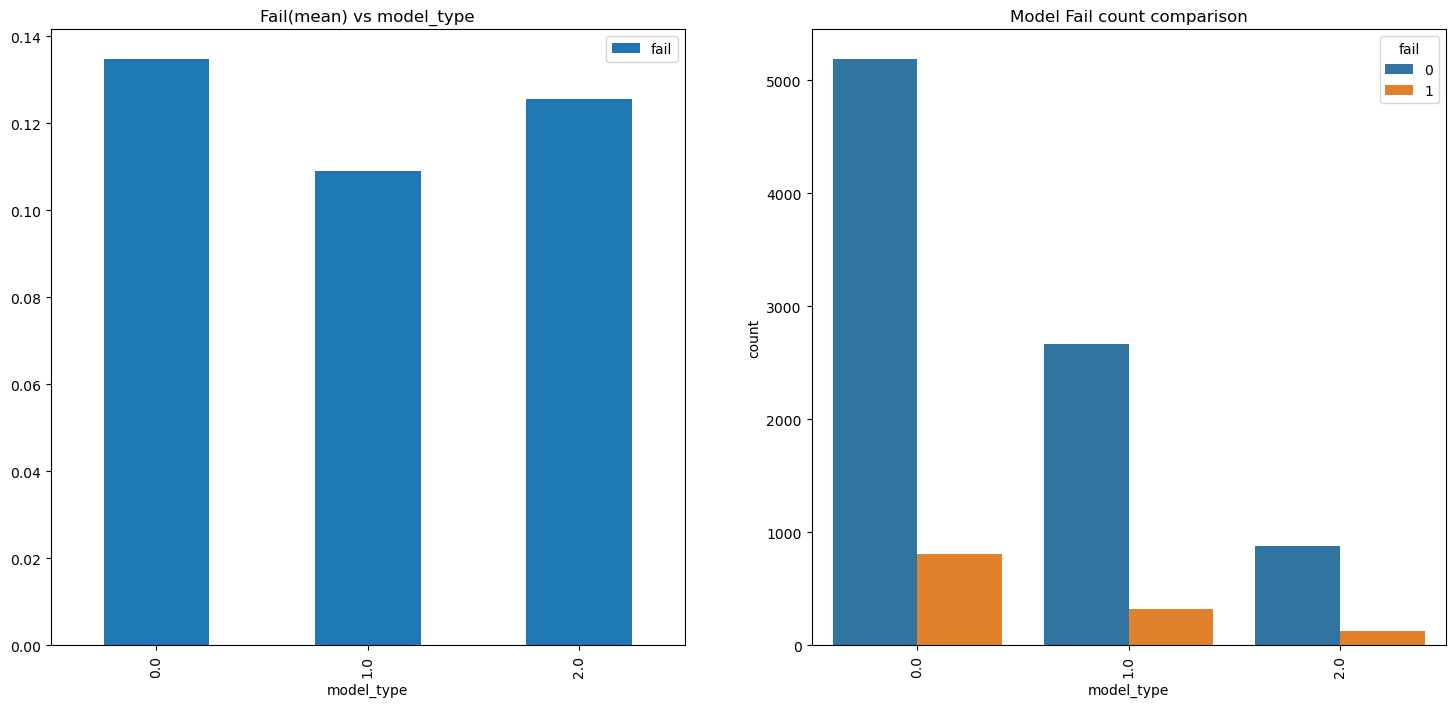

In [460]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df[['model_type','fail']].groupby(['model_type']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Fail(mean) vs model_type')
sns.countplot(x='model_type', hue='fail',data=df, ax=ax[1])
plt.xticks(rotation='vertical')
ax[1].set_title('Model Fail count comparison')
plt.show()

Model 3 seems to be encountering the highest failure rate, followed by Model 7 and then Model 5. \
Now let's create the feature 'year' and assess the failure rate. The assumption is made that the data was collected in 2022

In [461]:
df['year'] = 2023-df['Model'].str[-4:].astype('int')
print(df['year'].unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]


In [462]:
pd.crosstab(df.year,df.fail,margins=True).style.background_gradient(cmap='summer_r')


fail,0,1,All
year,,,
1,466,79,545
2,794,95,889
3,864,98,962
4,769,97,866
5,842,108,950
6,766,98,864
7,850,121,971
8,752,111,863
9,838,106,944


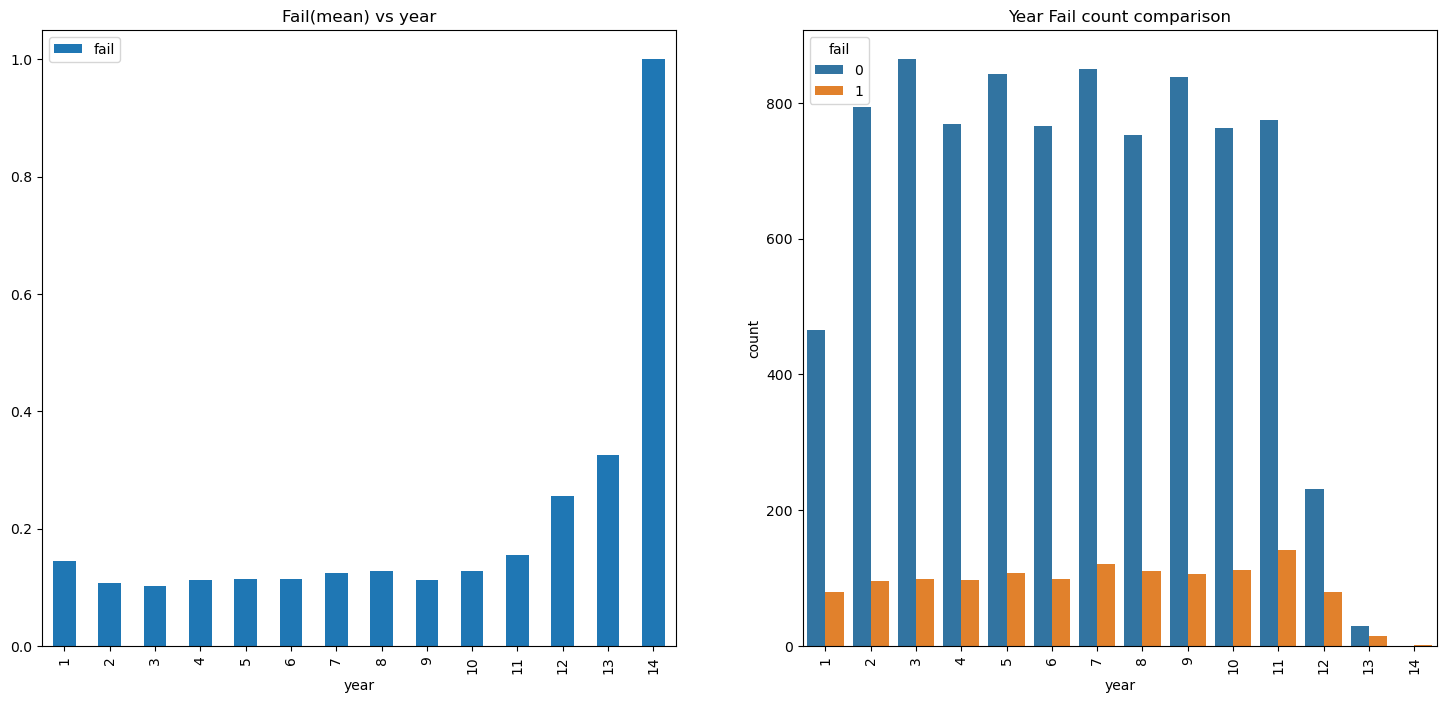

          fail
year          
1     0.144954
2     0.106862
3     0.101871
4     0.112009
5     0.113684
6     0.113426
7     0.124614
8     0.128621
9     0.112288
10    0.128000
11    0.155022
12    0.254839
13    0.325581
14    1.000000


In [463]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df[['year','fail']].groupby(['year']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Fail(mean) vs year')
sns.countplot(x='year', hue='fail',data=df, ax=ax[1])
plt.xticks(rotation='vertical')
ax[1].set_title('Year Fail count comparison')
plt.show()

print(df[['year','fail']].groupby(['year']).mean())

It appears that the failure rate increases the older the car is, with the exception of year 1 of having the car, which noted an increase in failure rate from 2021. The number of failures peaked at 142 in the 11th year, which is the earliest year in this study which observed >500 cars

<AxesSubplot:xlabel='model_type', ylabel='year'>

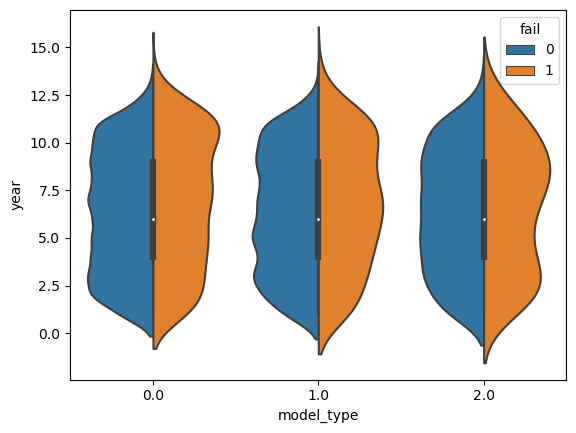

In [464]:
sns.violinplot(x='model_type', y = 'year', hue='fail', data=df, split =True)

Model 3 and Model 5 seem to follow a general trend of fewer failures the newer the car is, whereas for Model 7 there appears to be a dip in failures for cars in their 4th to 6th year.

# Usage (Ordinal)

In [465]:
pd.crosstab(df.Usage,df.fail,margins=True).style.background_gradient(cmap='summer_r')


fail,0,1,All
Usage,,,
High,2913,614,3527
Low,2922,216,3138
Medium,2903,432,3335
All,8738,1262,10000


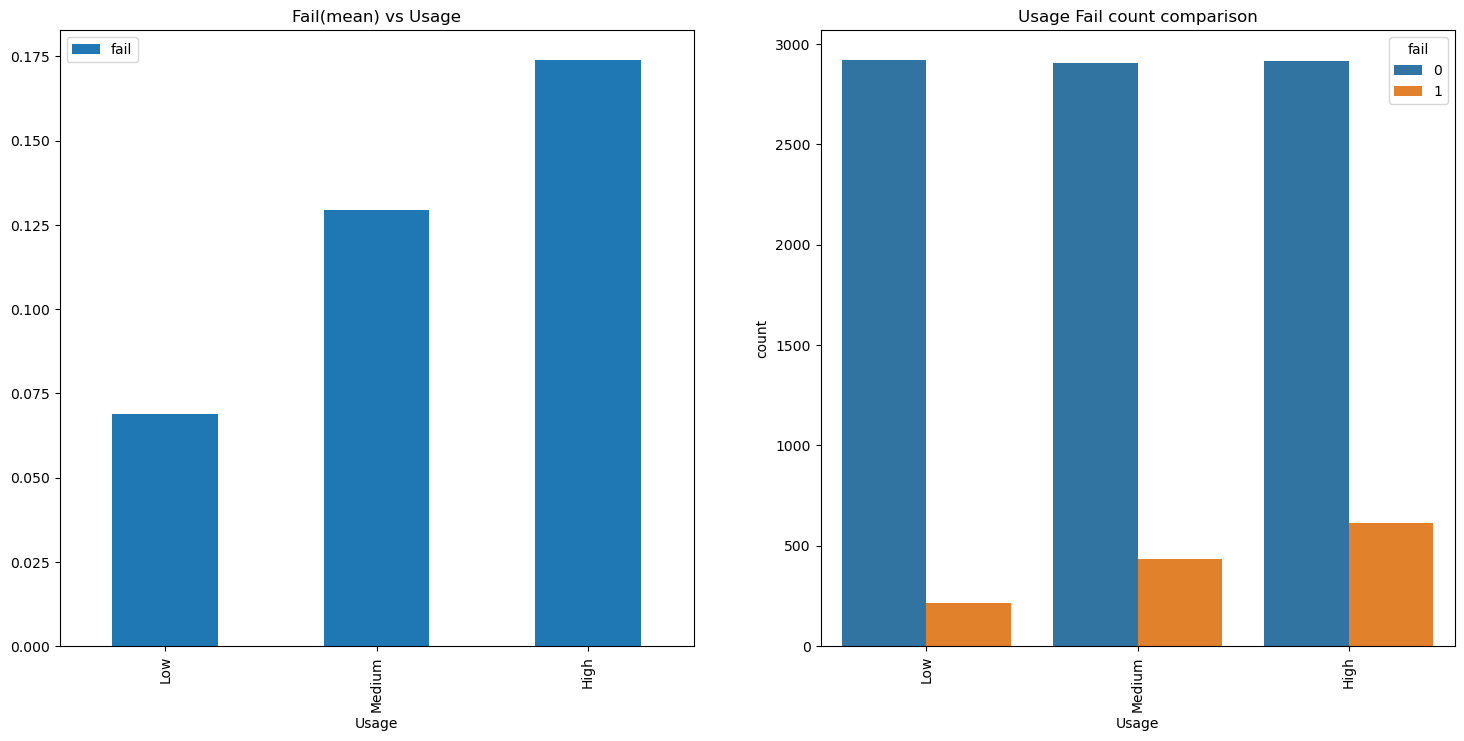

In [466]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df[['Usage','fail']].groupby(['Usage']).mean().sort_values('fail').plot.bar(ax=ax[0])
ax[0].set_title('Fail(mean) vs Usage')
sns.countplot(x='Usage', hue='fail',data=df, ax=ax[1], order=['Low','Medium','High'])
plt.xticks(rotation='vertical')
ax[1].set_title('Usage Fail count comparison')
plt.show()

As shown in both charts, there seems to be a higher tendency for failure to occur as usage increases.

# Membership (Ordinal)
We have seen from our initial exploration that Membership consists of None, Normal and Premium values. After removing duplicates, it was also found that there are 383 missing values. Given the information that cars bought within 5 years automatically have Normal membership, let's see how many missing values we can resolve.

In [467]:
print(df['year'].loc[df['Membership'].isnull()].value_counts())
df['year'].loc[df['Membership'].isnull()].value_counts().sum()

5    88
3    80
4    78
2    74
1    63
Name: year, dtype: int64


383

All 383 entries with null Membership values are cars which are bought within the last 5 years, hence minimally they are subscribed with Normal membership. Let us assign this to the missing entries.

In [468]:
df['Membership'].fillna('Normal', inplace=True)
df['Membership'].isnull().sum()

0

In [469]:
pd.crosstab(df.Membership,df.fail,margins=True).style.background_gradient(cmap='summer_r')


fail,0,1,All
Membership,,,
None,1265,453,1718
Normal,4281,585,4866
Premium,3192,224,3416
All,8738,1262,10000


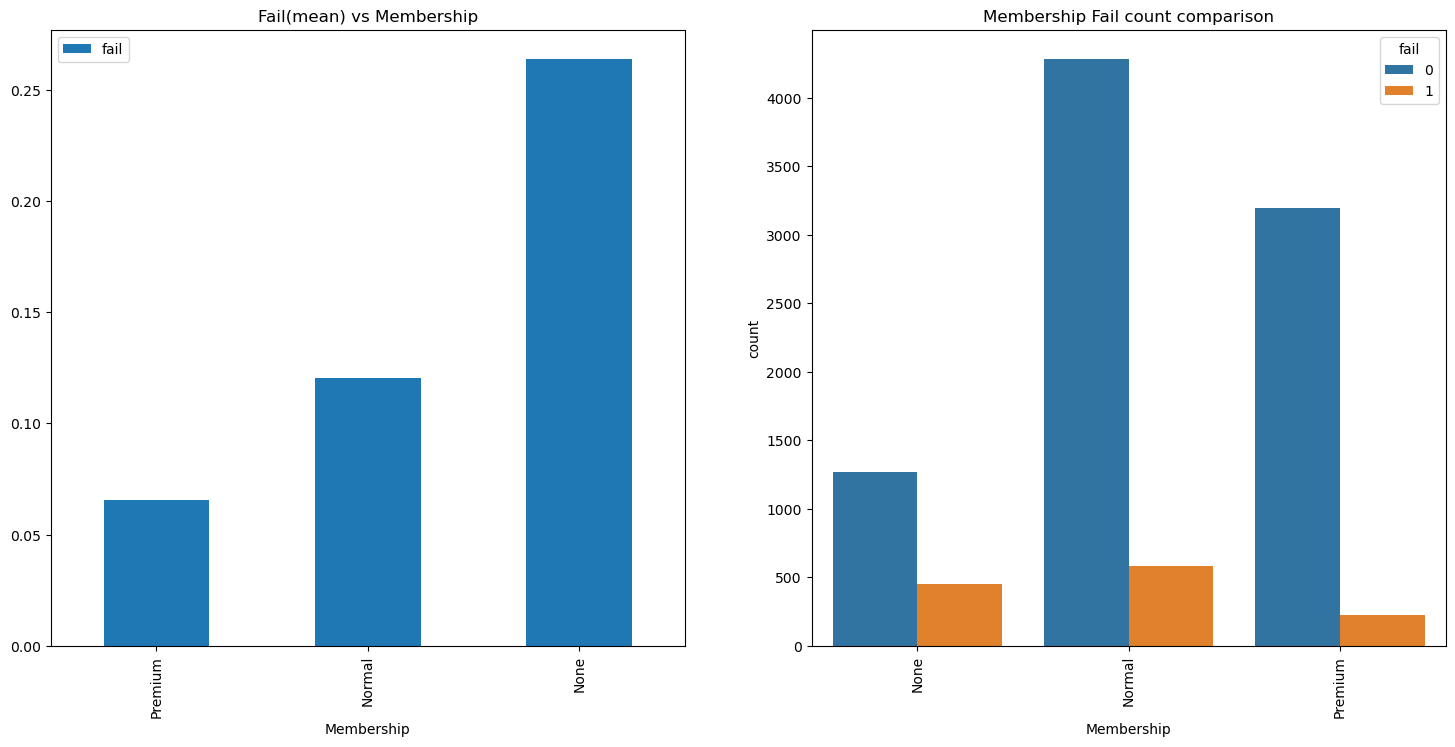

In [470]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df[['Membership','fail']].groupby(['Membership']).mean().sort_values('fail').plot.bar(ax=ax[0])
ax[0].set_title('Fail(mean) vs Membership')
sns.countplot(x='Membership', hue='fail',data=df, ax=ax[1], order=['None','Normal','Premium'])
plt.xticks(rotation='vertical')
ax[1].set_title('Membership Fail count comparison')
plt.show()

Cars with no membership seem to be most at risk of failure, having the highest failure rates, higher than Normal and Premium membership cars by a large margin. Normal membership cars are next in line, followed by Premium cars with the lowest failure rates. An additional detail to take into account is that all cars with no membership are more than 5 years old. Let's compare with years feature.

<AxesSubplot:xlabel='Membership', ylabel='year'>

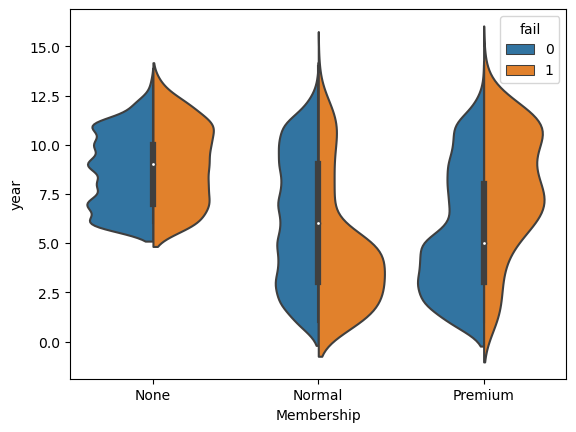

In [471]:
sns.violinplot(x='Membership', y = 'year', hue='fail', data=df, split =True, order=['None','Normal','Premium'] )

Text(0.5, 1.0, 'Cars by Age with Premium Membership')

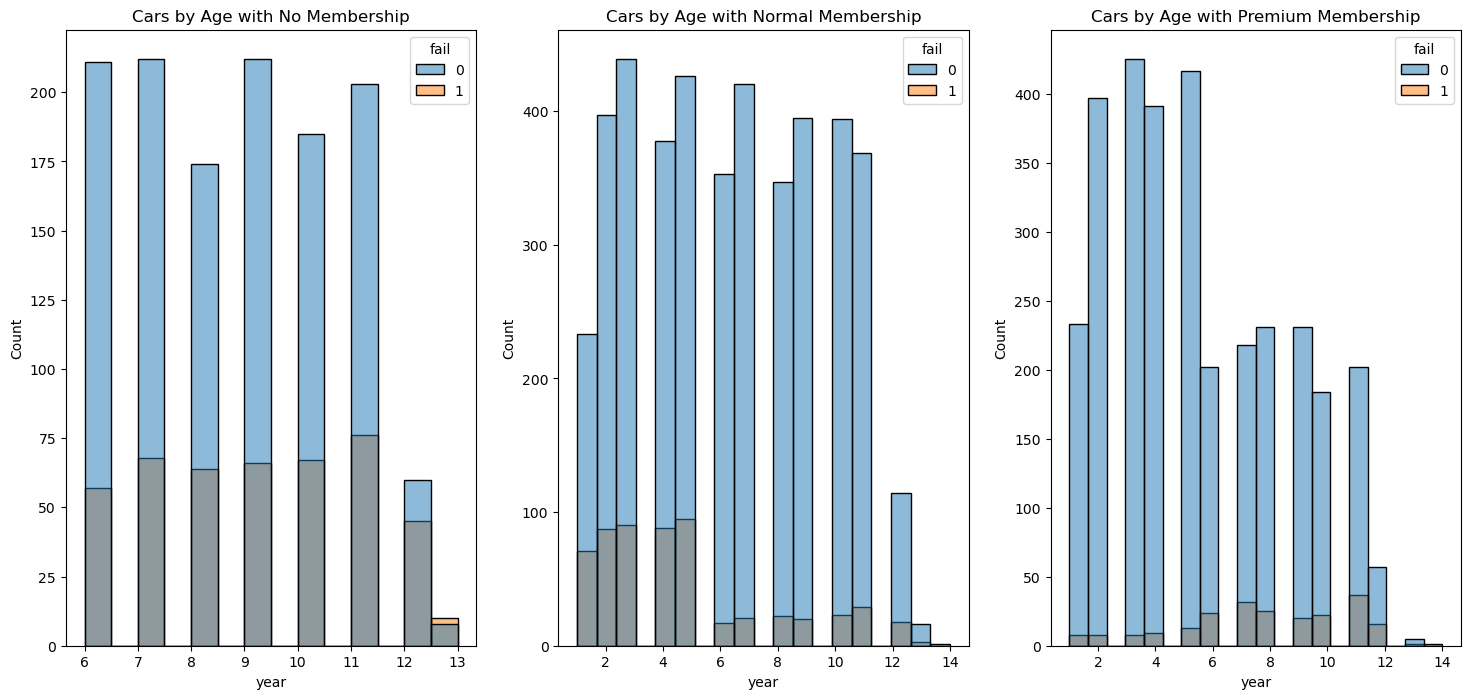

In [472]:
f,ax = plt.subplots(1,3,figsize=(18,8))
df_member_none=df[df.Membership=='None']
df_member_norm=df[df.Membership=='Normal']
df_member_prem=df[df.Membership=='Premium']
sns.histplot(data=df_member_none, x='year', hue='fail', ax=ax[0])
sns.histplot(data=df_member_norm, x='year', hue='fail', ax=ax[1])
sns.histplot(data=df_member_prem, x='year', hue='fail', ax=ax[2])
ax[0].set_title('Cars by Age with No Membership')
ax[1].set_title('Cars by Age with Normal Membership')
ax[2].set_title('Cars by Age with Premium Membership')

For cars with no membership, it seems like there is a high and general increase in failure as the year increases from 5 onwards. \
For cars with Normal membership, there is a high proportion of failures within the first five years of purchase, after which the numbers experience a sharp drop with a gradual increase as the year increases. \
For cars with Premium membership, car failures run relatively low for cars within the first five years, after which there seems to be a higher occurence of failure.

# Temperature (Continuous)
The Temperature feature is defined as the average temperature of the car engine for the past 30 days. It is a continuous feature, however in the database the unit is included in the entry, turning into a string. Let's correct that.

In [473]:
import re
def remove_c(temp_string) : 
    #Searching for digits in string but leaving the decimal place in
    temp = re.search('\d+\.\d+', temp_string)
    if temp is not None:
        #Convert extracted number to float and return value
        return float(temp.group(0))
df['temp_c'] = df['Temperature'].apply(remove_c)

#Confirm successful conversion
print(df[['temp_c','Temperature']].head())
print(type(df['temp_c'][0]))

   temp_c Temperature
0   110.3    110.3 °C
1   110.4    110.4 °C
2   110.3    110.3 °C
3   110.4    110.4 °C
4   230.7    230.7 °C
<class 'numpy.float64'>


In [474]:
df.temp_c.describe()

count    10000.000000
mean       139.700810
std         50.813614
min        110.000000
25%        110.600000
50%        112.200000
75%        125.400000
max        278.200000
Name: temp_c, dtype: float64

<AxesSubplot:ylabel='temp_c'>

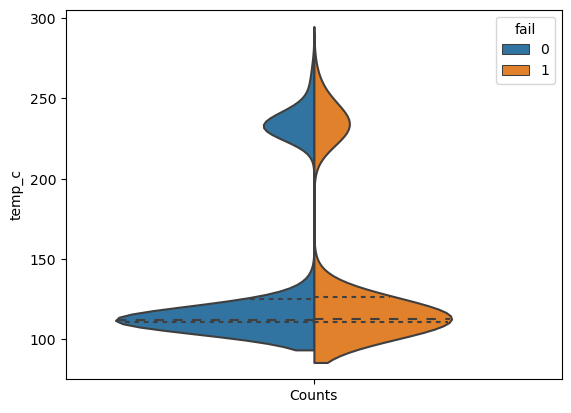

In [475]:
sns.violinplot(x=['Counts']*len(df), y = 'temp_c', hue='fail', data=df, split=True, inner='quart')

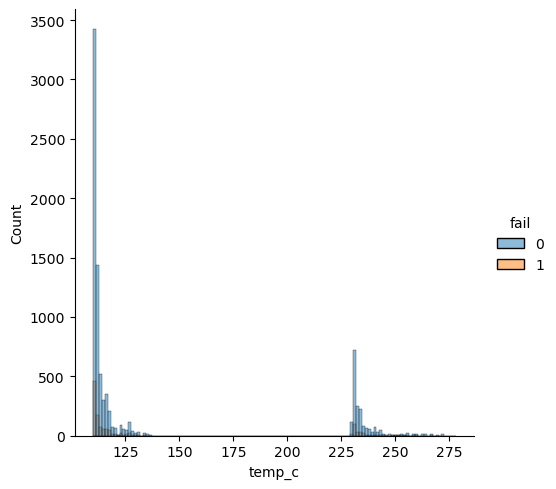

In [476]:
sns.displot(data=df, x='temp_c', hue = 'fail')

In [477]:
df.temp_c.sort_values().unique()

array([110. , 110.1, 110.2, 110.3, 110.4, 110.5, 110.6, 110.7, 110.8,
       110.9, 111. , 111.1, 111.2, 111.3, 111.4, 111.5, 111.6, 111.7,
       111.8, 111.9, 112.1, 112.2, 112.4, 112.5, 112.7, 112.9, 113.1,
       113.3, 113.6, 113.8, 114.1, 114.4, 114.7, 115.1, 115.4, 115.8,
       116.2, 116.7, 117.2, 117.7, 118.2, 118.8, 119.5, 120.1, 120.9,
       121.6, 122.5, 123.4, 124.3, 125.4, 126.5, 127.7, 128.9, 130.3,
       131.7, 133.3, 135. , 136.8, 138.7, 230.1, 230.2, 230.3, 230.4,
       230.5, 230.6, 230.7, 230.8, 230.9, 231. , 231.1, 231.2, 231.3,
       231.4, 231.5, 231.6, 231.7, 231.9, 232. , 232.1, 232.3, 232.4,
       232.6, 232.8, 233. , 233.2, 233.5, 233.7, 234. , 234.3, 234.6,
       234.9, 235.2, 235.6, 236. , 236.5, 236.9, 237.4, 237.9, 238.5,
       239.1, 239.8, 240.5, 241.2, 242. , 242.9, 243.8, 244.8, 245.9,
       247. , 248.3, 249.6, 251. , 252.5, 254.1, 255.8, 257.7, 259.7,
       261.8, 264.1, 266.5, 269.1, 271.9, 274.9, 278.2])

From the distribution charts, it is observed that the car engine temperatures are grouped into 2 clusters. The first cluster is between 110 and 138.7, the second is between 230.1 and 278.2. \
\
There are 2 positively skewed distributions, one at the 100s range and one in the 200s. However, having car engine temperature above 200 degrees Celsius seems to be abnormal. Could they be entered in Fahrenheit? Are they all from the US? Let's take a look at the details for entries with temperature above 200 degrees.

In [478]:
df.loc[(df['temp_c'] >= 200)][['Temperature','temp_c','Factory']].value_counts()

Temperature  temp_c  Factory         
230.4 °F     230.4   New York, U.S       143
231.1 °F     231.1   New York, U.S        91
230.6 °F     230.6   New York, U.S        86
230.7 °F     230.7   New York, U.S        84
233.7 °F     233.7   New York, U.S        79
                                        ... 
234.6 °F     234.6   Shang Hai, China      1
240.5 °F     240.5   Shang Hai, China      1
239.8 °F     239.8   Shang Hai, China      1
230.7 °C     230.7   New York, U.S         1
278.2 °F     278.2   New York, U.S         1
Length: 99, dtype: int64

There are entries above 200 degrees in Celsius as well. How many are there?

In [479]:
df.loc[(df['temp_c'] >= 200)&(df['Temperature'].str.contains('C'))][['Temperature','temp_c','Factory']].value_counts()

Temperature  temp_c  Factory      
230.7 °C     230.7   New York, U.S    1
dtype: int64

There is only 1, it may be considered an outlier. Let's look for temperatures in Fahrenheit below 200 degrees.

In [480]:
df.loc[(df['temp_c'] <= 200)&(df['Temperature'].str.contains('F'))][['Temperature','temp_c','Factory']].value_counts()

Series([], dtype: int64)

There are no entries below 200 degrees that are in Fahrenheit. Let's proceed to convert all the temperatures in Fahrenheit to Celsius in temp_c column.

In [481]:
df['temp_c'] = df[['temp_c','Temperature']].apply(lambda x: (x['temp_c']-32)*5/9 if 'F' in x['Temperature'] else x['temp_c'], axis=1)

df.loc[(df['Temperature'].str.contains('F'))][['Temperature','temp_c','Factory']].value_counts()

Temperature  temp_c      Factory         
230.4 °F     110.222222  New York, U.S       143
231.1 °F     110.611111  New York, U.S        91
230.6 °F     110.333333  New York, U.S        86
230.7 °F     110.388889  New York, U.S        84
233.7 °F     112.055556  New York, U.S        79
                                            ... 
230.1 °F     110.055556  Shang Hai, China      1
236.5 °F     113.611111  Shang Hai, China      1
237.9 °F     114.388889  Shang Hai, China      1
239.8 °F     115.444444  Shang Hai, China      1
278.2 °F     136.777778  New York, U.S         1
Length: 98, dtype: int64

In [482]:
#Tidy up the numbers
decimals=1
df['temp_c']=df['temp_c'].apply(lambda x: round(x,decimals))
df.loc[df['Temperature'].str.contains('F')][['temp_c','Temperature']].head()

,temp_c,Temperature
10,110.4,230.8 °F
11,110.5,230.9 °F
17,110.5,230.9 °F
24,110.6,231.1 °F
29,110.6,231.1 °F


Let's take a look at the details on the corrected data again.

In [483]:
df.temp_c.describe()

count    10000.000000
mean       113.118580
std          4.670757
min        110.000000
25%        110.400000
50%        111.400000
75%        113.600000
max        230.700000
Name: temp_c, dtype: float64

In [484]:
df.temp_c.sort_values().unique()

array([110. , 110.1, 110.2, 110.3, 110.4, 110.5, 110.6, 110.7, 110.8,
       110.9, 111. , 111.1, 111.2, 111.3, 111.4, 111.5, 111.6, 111.7,
       111.8, 111.9, 112.1, 112.2, 112.4, 112.5, 112.6, 112.7, 112.9,
       113.1, 113.3, 113.6, 113.8, 114.1, 114.4, 114.7, 115.1, 115.4,
       115.8, 116.2, 116.7, 117.2, 117.7, 118.2, 118.8, 119.4, 119.5,
       120.1, 120.2, 120.9, 121.6, 121.7, 122.5, 123.4, 124.3, 125.4,
       126.5, 127.7, 128.9, 130.3, 131.7, 133.3, 134.9, 135. , 136.8,
       138.7, 230.7])

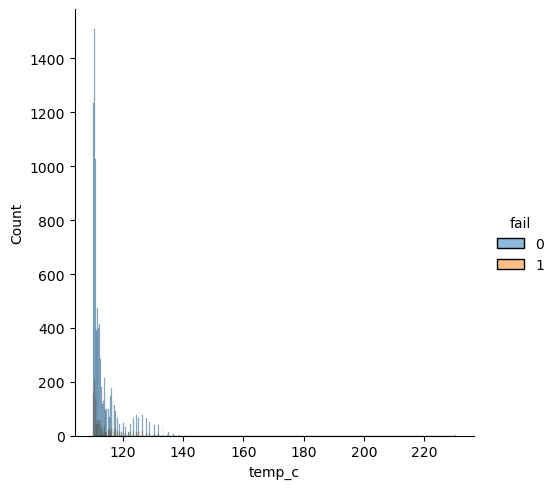

In [485]:
sns.displot(data=df, x='temp_c', hue = 'fail')

There are outliers at more than 200 degrees celsius causing the distribution to be even highly skewed. Let's remove them and other outliers as well.

In [486]:
q_cutoff=df['temp_c'].quantile(0.95)
mask = df['temp_c']<q_cutoff
df = df[mask]
df['temp_c'].describe()

count    9449.000000
mean      112.238184
std         2.708287
min       110.000000
25%       110.400000
50%       111.200000
75%       112.900000
max       123.400000
Name: temp_c, dtype: float64

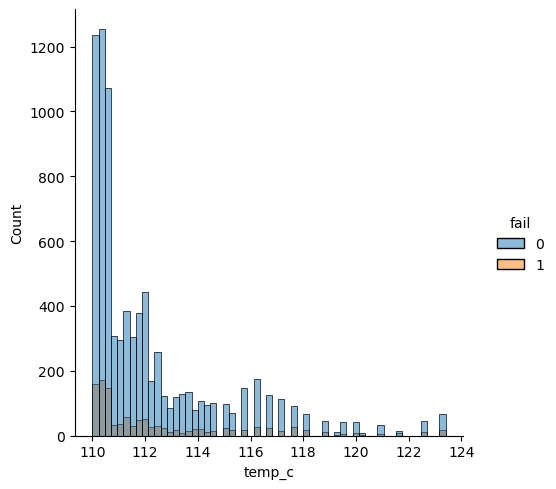

In [487]:
sns.displot(data=df, x='temp_c', hue = 'fail')

In [488]:
#Attempt to discretize the data
var='temp_c'
num_bin=8
df['temp_band2']=pd.qcut(x=df[var], q=num_bin, duplicates = 'drop')
df.groupby('temp_band2').size()

temp_band2
(109.999, 110.2]    1394
(110.2, 110.4]      1424
(110.4, 110.6]       925
(110.6, 111.2]      1069
(111.2, 111.8]      1101
(111.8, 112.9]      1220
(112.9, 115.8]      1251
(115.8, 123.4]      1065
dtype: int64

In [489]:
df.temp_band2.head()

0    (110.2, 110.4]
1    (110.2, 110.4]
2    (110.2, 110.4]
3    (110.2, 110.4]
5    (110.2, 110.4]
Name: temp_band2, dtype: category
Categories (8, interval[float64, right]): [(109.999, 110.2] < (110.2, 110.4] < (110.4, 110.6] < (110.6, 111.2] < (111.2, 111.8] < (111.8, 112.9] < (112.9, 115.8] < (115.8, 123.4]]

In [490]:
df.loc[df.temp_c<110,'temp_band'] = 0
df.loc[(df.temp_c>109.999)&(df.temp_c<=110.2),'temp_band'] = 1
df.loc[(df.temp_c>110.2)&(df.temp_c<=110.4),'temp_band'] = 2
df.loc[(df.temp_c>110.4)&(df.temp_c<=110.6),'temp_band'] = 3
df.loc[(df.temp_c>110.6)&(df.temp_c<=111.2),'temp_band'] = 4
df.loc[(df.temp_c>111.2)&(df.temp_c<=111.8),'temp_band'] = 5
df.loc[(df.temp_c>111.8)&(df.temp_c<=112.9),'temp_band'] = 6
df.loc[(df.temp_c>112.9)&(df.temp_c<=115.8),'temp_band'] = 7
df.loc[(df.temp_c>115.8)&(df.temp_c<=123.4),'temp_band'] = 8
df.loc[(df.temp_c>123.4),'temp_band'] = 9

In [491]:
df.temp_band.isnull().sum()

0

There are no values left out. Band 0 and 9 are for catching outliers beyond the current range, the rest are cover. Let's see the distribution according to temperature bands.

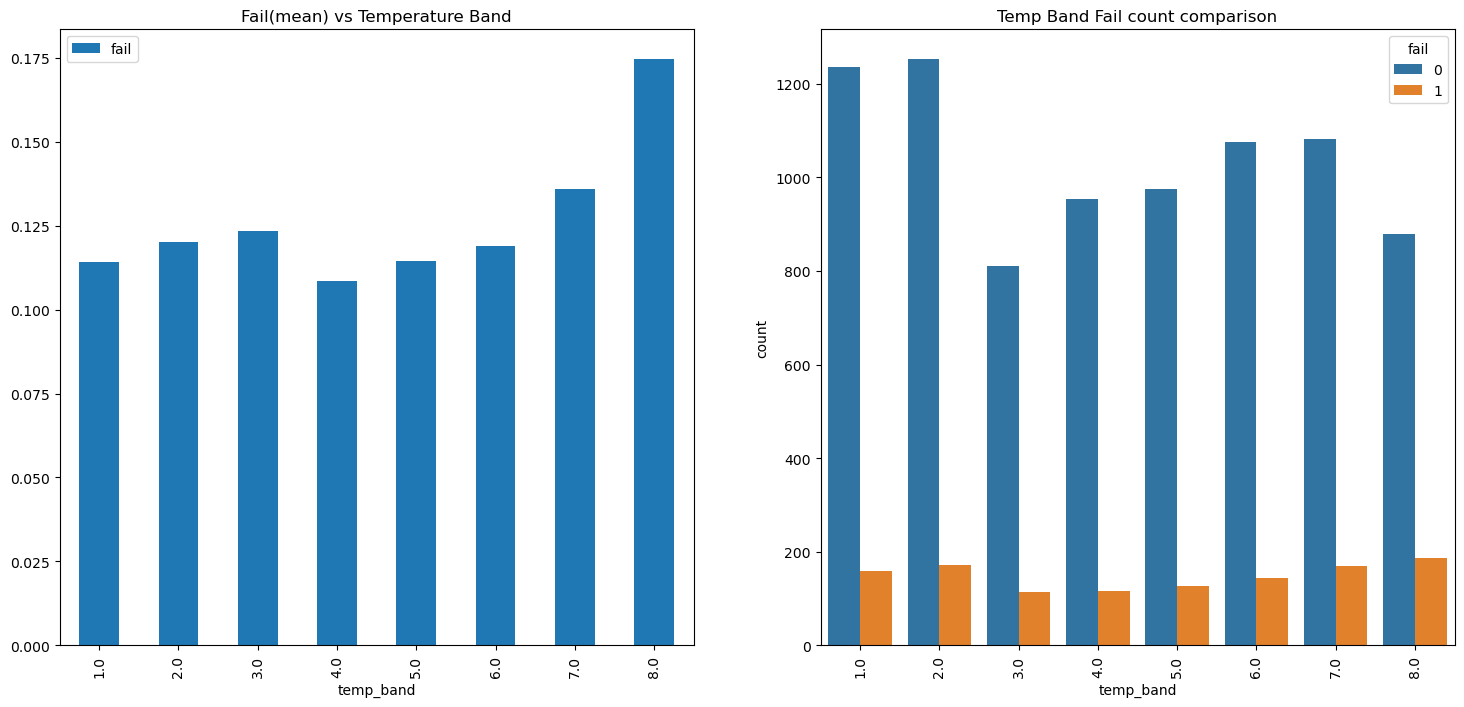

In [492]:
temp_band_list = df.temp_band.sort_values().unique()
f,ax=plt.subplots(1,2,figsize=(18,8))
df[['temp_band','fail']].groupby(['temp_band']).mean().sort_values('temp_band').plot.bar(ax=ax[0])
ax[0].set_title('Fail(mean) vs Temperature Band')
sns.countplot(x='temp_band', hue='fail',data=df, ax=ax[1], order=temp_band_list)
plt.xticks(rotation='vertical')
ax[1].set_title('Temp Band Fail count comparison')
plt.show()

In [493]:
df[['temp_band','fail']].groupby(['temp_band']).mean()

,fail
temp_band,
1.0,0.114060
2.0,0.120084
3.0,0.123243
4.0,0.108513
5.0,0.114441
6.0,0.118852
7.0,0.135891
8.0,0.174648


The higher end of the temperature range seems to have a higher chance of car failure, with Band 8 having the highest failure rate and Band 7 next. The mid-range Band 4 appears to give the best performance. The distribution is highly skewed, hence some scaling will be required. 

# RPM (Continuous)
RPM is the average maximum torque speed at maximum torque over 30 days before car failure.

In [494]:
df.RPM.describe()

count    9449.000000
mean     1469.408509
std       487.541965
min     -2636.000000
25%      1417.000000
50%      1498.000000
75%      1608.000000
max      2886.000000
Name: RPM, dtype: float64

In [495]:
(df.RPM<0).sum()

210

There are 220 negative values in RPM feature, they need to be converted to positive values.

In [496]:
df.RPM = df.RPM.abs()
df.RPM.describe()

count    9449.000000
mean     1537.871627
std       178.290780
min      1168.000000
25%      1423.000000
50%      1503.000000
75%      1611.000000
max      2886.000000
Name: RPM, dtype: float64

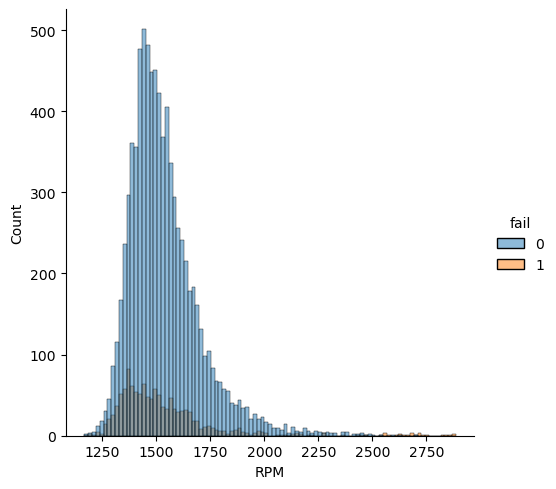

In [497]:
sns.displot(data=df, x='RPM', hue = 'fail')

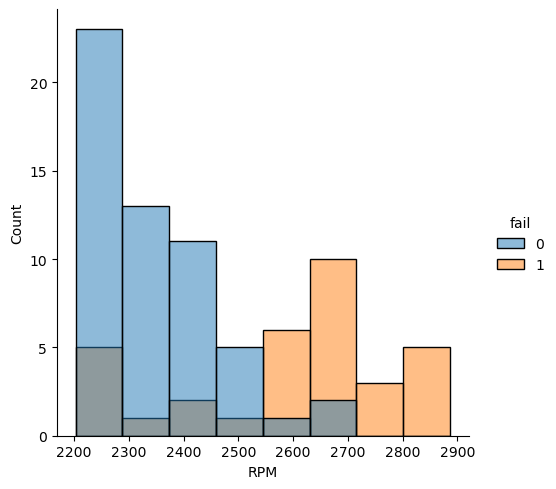

In [498]:
#Zoom in to distribution for RPM>2200 due to highly skewed data
df_RPMhigh = df[df.RPM>2200]
sns.displot(data=df_RPMhigh, x='RPM', hue = 'fail')

<AxesSubplot:ylabel='RPM'>

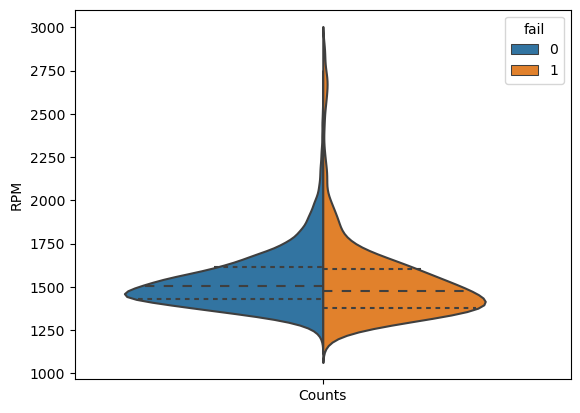

In [499]:
sns.violinplot(x=['Counts']*len(df), y = 'RPM', data=df, split=True, hue='fail', inner='quart')

<AxesSubplot:ylabel='RPM'>

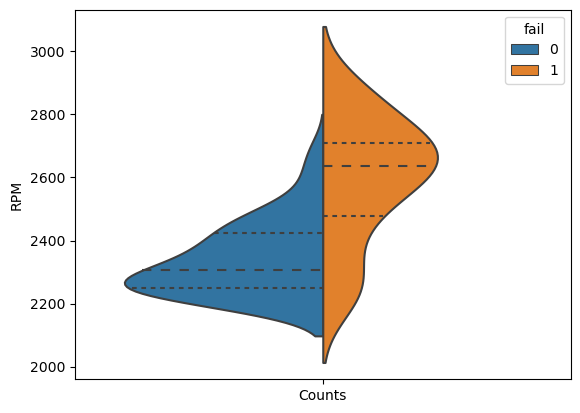

In [500]:
#Zoom in to distribution for RPM>2200 due to highly skewed data
sns.violinplot(x=['Counts']*len(df_RPMhigh), y = 'RPM', data=df_RPMhigh, split=True, hue='fail', inner='quart')

From the above charts, it is observed that at the lower ranges of RPM (<1400) there is a larger proportion of cars encountering failure. At the higher end of RPM from approximately 2500 and above, the car failure rate greatly increases as well. The distribution also appears to be highly skewed, indicating that some scaling may be necessary.

# Fuel Consumption (Continuous)
The Fuel Consumption feature is defined as the fuel consumption of the car in litres per kilometre. There are no null values as shown in the initial exploration.

In [501]:
df['Fuel consumption'].describe()

count    9449.000000
mean      679.331517
std        58.468273
min       598.500000
25%       638.600000
50%       668.400000
75%       704.300000
max       904.800000
Name: Fuel consumption, dtype: float64

In [502]:
df['Fuel consumption'].isnull().sum()

0

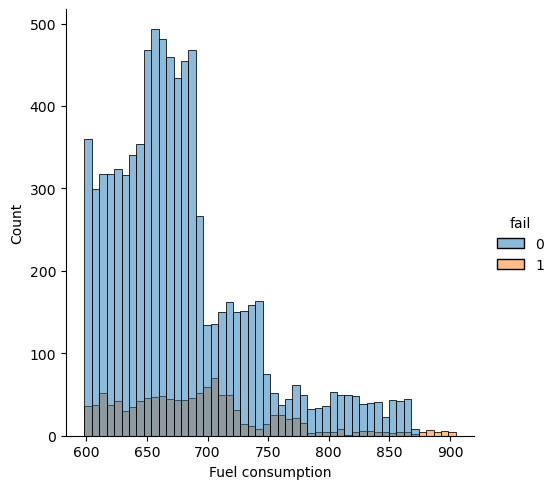

In [503]:
sns.displot(data=df, x='Fuel consumption', hue = 'fail')

<AxesSubplot:ylabel='Fuel consumption'>

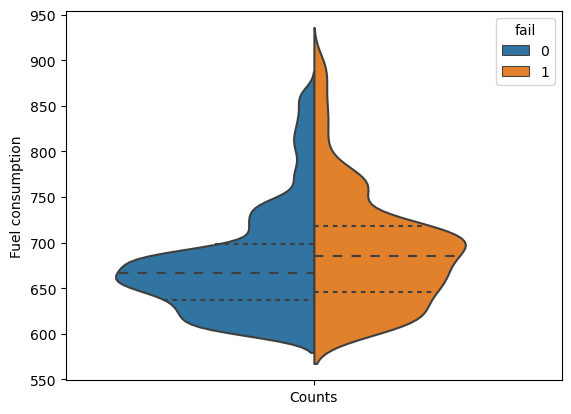

In [504]:
sns.violinplot(x=['Counts']*len(df), y = 'Fuel consumption', data=df, split=True, hue='fail', inner='quart')

Fuel consumption appears to be another skewed distribution, with a higher proportion in the lower end of fuel consumption. Failure rate appears to be the lowest between 650 to 700, spiking at 700-725 and 750-780. Beyond fuel consumption of approximately 870, all cars have encountered failure. Scaling is required for this feature.

# At a glance

Color: Grey cars have the highest failure rate, while blue cars have the lowest.\
\
Factory: Cars from Shang Hai, China encountered the most failures and have the highest failure rate, followed by Germany then U.S.\
\
Model: Model 3 has the most failures and highest failure rate, while Model 5 appears to have the lowest chance of encountering failure\
\
Year: The older the car is, the higher the chance of failure especially beyond year 10, with the exception of the first year. For Model 7 cars, the failure rate seems to dip in the 4th to 6th year.\
\
Usage: There is a higher tendency for failure to occur as usage increases.\
\
Membership: Cars with no membership are most of risk of failure and there is a general increase in failure over time. Cars with Normal membership have a high failure rate within the first five years followed by a sharp drop with a gradual increase. Cars with Premium membership experience the lowest chances of failure for the first five year followed by a substantial increase in failure rate after that.\
\
Temperature: There are two clusters of car engine temperatures. For the both clusters, lowest band has the largest volume hence highest number of car failures. However for both, the mid range has the highest failure rates instead.\
\
RPM: The lower end of RPM, as well as the extreme high end of RPM range experiences higher failure rates. The distribution is highly skewed.\
\
Fuel Consumption: Positive skewed distribution, with the lowest failure rate within the modal range of fuel consumption


# 4. Correlation Between Features
Let's check for correlation between the other features. Before that, we should check for features that are no longer required. For example, Failure A to E.

In [505]:
df=df.drop(['Failure A','Failure B','Failure C','Failure D','Failure E','Car ID','Model','Temperature'],axis=1)
df.head()

,Color,RPM,Factory,Usage,Fuel consumption,Membership,fail,model_type,year,temp_c,temp_band2,temp_band
0,Blue,1551,"Shang Hai, China",Medium,659.7,Normal,0,1.0,1,110.3,"(110.2, 110.4]",2.0
1,Black,1408,"Shang Hai, China",Medium,705.3,Premium,1,0.0,1,110.4,"(110.2, 110.4]",2.0
2,Grey,1498,"Shang Hai, China",Low,670.7,Premium,0,0.0,1,110.3,"(110.2, 110.4]",2.0
3,Black,1433,"Berlin, Germany",High,630.6,Premium,1,0.0,1,110.4,"(110.2, 110.4]",2.0
5,White,1425,"Shang Hai, China",Medium,691.8,Premium,0,1.0,2,110.3,"(110.2, 110.4]",2.0


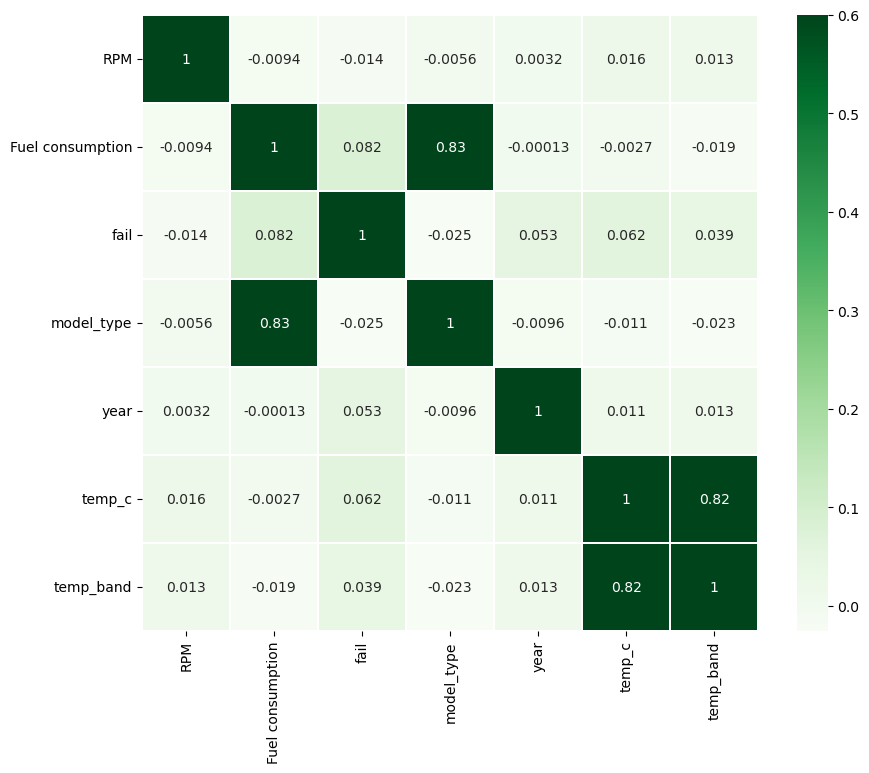

In [506]:
sns.heatmap(df[['RPM','Fuel consumption','fail','model_type','year','temp_c','temp_band']].corr(), vmax=0.6, linewidths=0.2, square=True, annot=True, cmap='Greens')
fig=plt.gcf()
fig.set_size_inches(10,8)

A warning was triggered when attempting to generate the correlation matrix for the entire dataframe, suggesting to only use numeric features instead. Let's do some feature engineering to convert the remaining features to numeric form.\
Keeping in mind that Color and Factory are categorical features, while Usage and Membership are ordinal features.

# 5. Feature Engineering
# Color/Factory Encoding
Color and Factory are categorical features, hence we will be using one-hot encoding to convert them to numeric form.

In [507]:
df = pd.get_dummies(df, columns=['Color', 'Factory'], prefix = ['C','F'], drop_first=True)
df.head()

,RPM,Usage,Fuel consumption,Membership,fail,model_type,year,temp_c,temp_band2,temp_band,C_Blue,C_Grey,C_Red,C_White,"F_New York, U.S","F_Shang Hai, China"
0,1551,Medium,659.7,Normal,0,1.0,1,110.3,"(110.2, 110.4]",2.0,1,0,0,0,0,1
1,1408,Medium,705.3,Premium,1,0.0,1,110.4,"(110.2, 110.4]",2.0,0,0,0,0,0,1
2,1498,Low,670.7,Premium,0,0.0,1,110.3,"(110.2, 110.4]",2.0,0,1,0,0,0,1
3,1433,High,630.6,Premium,1,0.0,1,110.4,"(110.2, 110.4]",2.0,0,0,0,0,0,0
5,1425,Medium,691.8,Premium,0,1.0,2,110.3,"(110.2, 110.4]",2.0,0,0,0,1,0,1


# Usage/Membership Encoding
Usage feature consist of Low, Medium and High values.\
Membership contains None, Normal and Premium.\
These entries can be assigned numbers to indicate an order within each feature.

In [508]:
#Encoding Usage
dict_u = {'Low':0, 'Medium':1, 'High':2}
    
for i,j in dict_u.items():
    df.loc[df.Usage.str.contains(i),'u_enc']=j

df[['Usage','u_enc']].head()

,Usage,u_enc
0,Medium,1.0
1,Medium,1.0
2,Low,0.0
3,High,2.0
5,Medium,1.0


In [509]:
#Encoding Membership
dict_mem = {'None':0, 'Normal':1, 'Premium':2}
    
for i,j in dict_mem.items():
    df.loc[df.Membership.str.contains(i),'mem_enc']=j

df[['Membership','mem_enc']].head()

,Membership,mem_enc
0,Normal,1.0
1,Premium,2.0
2,Premium,2.0
3,Premium,2.0
5,Premium,2.0


# Further Feature Engineering
During feature analysis, we have observed skewed distributions for RPM, Fuel consumption and Temperature features. Hence they require some scaling/transforming. Furthermore, many ML models assume the normal distribution in data, hence converting the data to normal distribution will help as well.

# RPM
RPM distribution appears to be heavily skewed, hence we will proceed to use log transformation on this feature.

In [510]:
#Import log transformer
from sklearn.preprocessing import PowerTransformer
log = PowerTransformer()

#Fit to the data
log.fit(df[['RPM']])

#Transform and create new feature
df['log_RPM']= log.transform(df[['RPM']])
df[['RPM','log_RPM']].head()

,RPM,log_RPM
0,1551,0.313677
1,1408,-0.799045
2,1498,-0.048010
3,1433,-0.570662
5,1425,-0.641946


Let's check the distribution after log transformation.

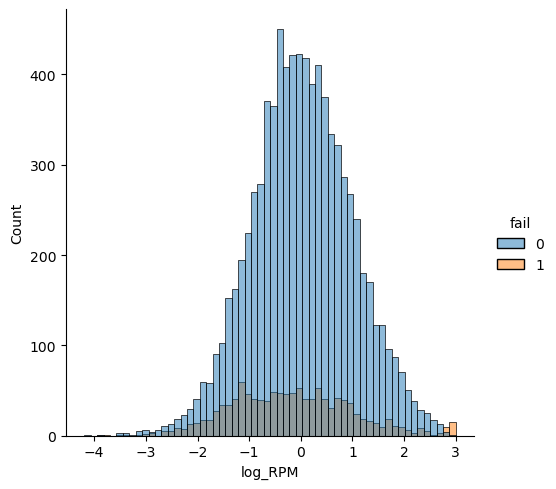

In [511]:
sns.displot(data=df, x='log_RPM', hue = 'fail')

# Fuel Consumption
The fuel consumption feature also showed a skewed distribution. The same log transformation will be used on this feature.

In [512]:
#Log transformer has been imported, start with fitting the data
log.fit(df[['Fuel consumption']])

#Transform and create new feature
df['log_fuel']= log.transform(df[['Fuel consumption']])
df[['Fuel consumption','log_fuel']].head()

,Fuel consumption,log_fuel
0,659.7,-3.358425e-15
1,705.3,1.285083e-14
2,670.7,1.110223e-15
3,630.6,-1.731948e-14
5,691.8,8.659740e-15


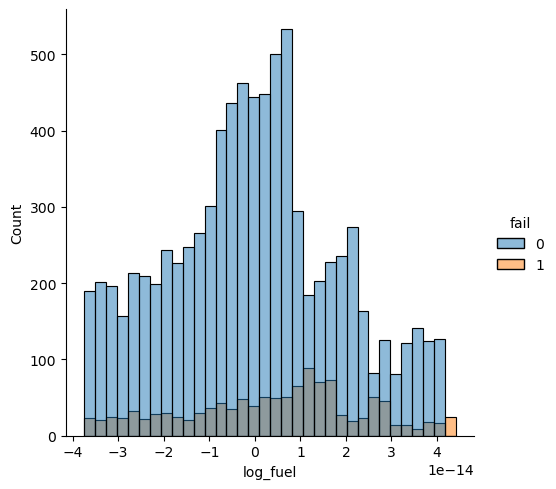

In [513]:
sns.displot(data=df, x='log_fuel', hue = 'fail')

# Temperature
Similar to RPM, the temperature feature also appears to have a highly skewed positive distribution. Hence, log transformation will be used on this feature as well.

In [514]:
#Log transformer has been imported, start with fitting the data
log.fit(df[['temp_c']])

#Transform and create new feature
df['log_temp']= log.transform(df[['temp_c']])
df[['temp_c','log_temp']].head()

,temp_c,log_temp
0,110.3,-1.942890e-16
1,110.4,-1.942890e-16
2,110.3,-1.942890e-16
3,110.4,-1.942890e-16
5,110.3,-1.942890e-16


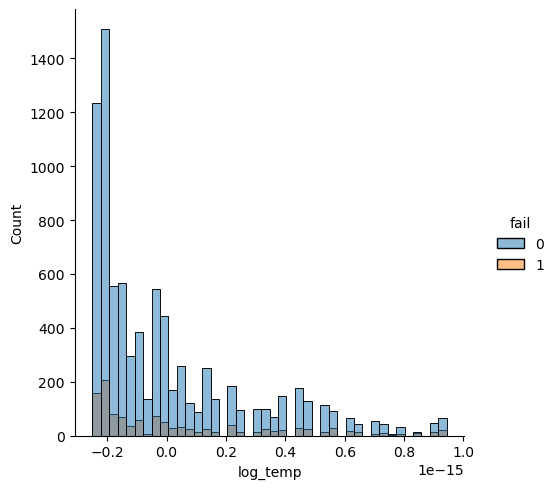

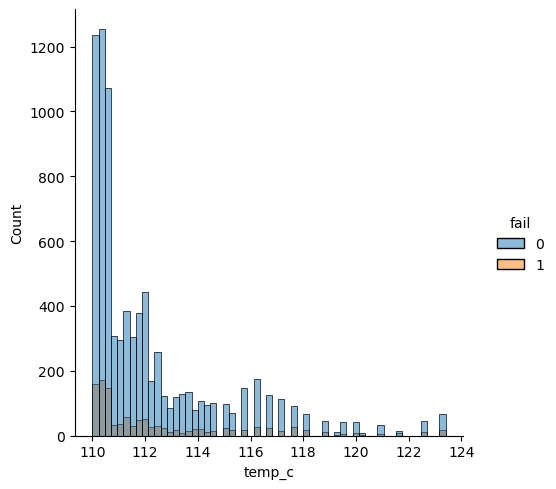

In [515]:
sns.displot(data=df, x='log_temp', hue = 'fail')
sns.displot(data=df, x='temp_c', hue = 'fail')

After log transformation, the distribution remains skewed, although less so.

# Final review of data and correlation matrix

All features have been engineered, let's take a look at the correlation matrix again. First, a quick look at the dataframe to assess which features to use.

In [516]:
df.columns.values

array(['RPM', 'Usage', 'Fuel consumption', 'Membership', 'fail',
       'model_type', 'year', 'temp_c', 'temp_band2', 'temp_band',
       'C_Blue', 'C_Grey', 'C_Red', 'C_White', 'F_New York, U.S',
       'F_Shang Hai, China', 'u_enc', 'mem_enc', 'log_RPM', 'log_fuel',
       'log_temp'], dtype=object)

In [517]:
df_corr = pd.DataFrame(df.iloc[:,4:].drop(columns='temp_band2'))
df_corr.head()

,fail,model_type,year,temp_c,temp_band,C_Blue,C_Grey,C_Red,C_White,"F_New York, U.S","F_Shang Hai, China",u_enc,mem_enc,log_RPM,log_fuel,log_temp
0,0,1.0,1,110.3,2.0,1,0,0,0,0,1,1.0,1.0,0.313677,-3.358425e-15,-1.942890e-16
1,1,0.0,1,110.4,2.0,0,0,0,0,0,1,1.0,2.0,-0.799045,1.285083e-14,-1.942890e-16
2,0,0.0,1,110.3,2.0,0,1,0,0,0,1,0.0,2.0,-0.048010,1.110223e-15,-1.942890e-16
3,1,0.0,1,110.4,2.0,0,0,0,0,0,0,2.0,2.0,-0.570662,-1.731948e-14,-1.942890e-16
5,0,1.0,2,110.3,2.0,0,0,0,1,0,1,1.0,2.0,-0.641946,8.659740e-15,-1.942890e-16


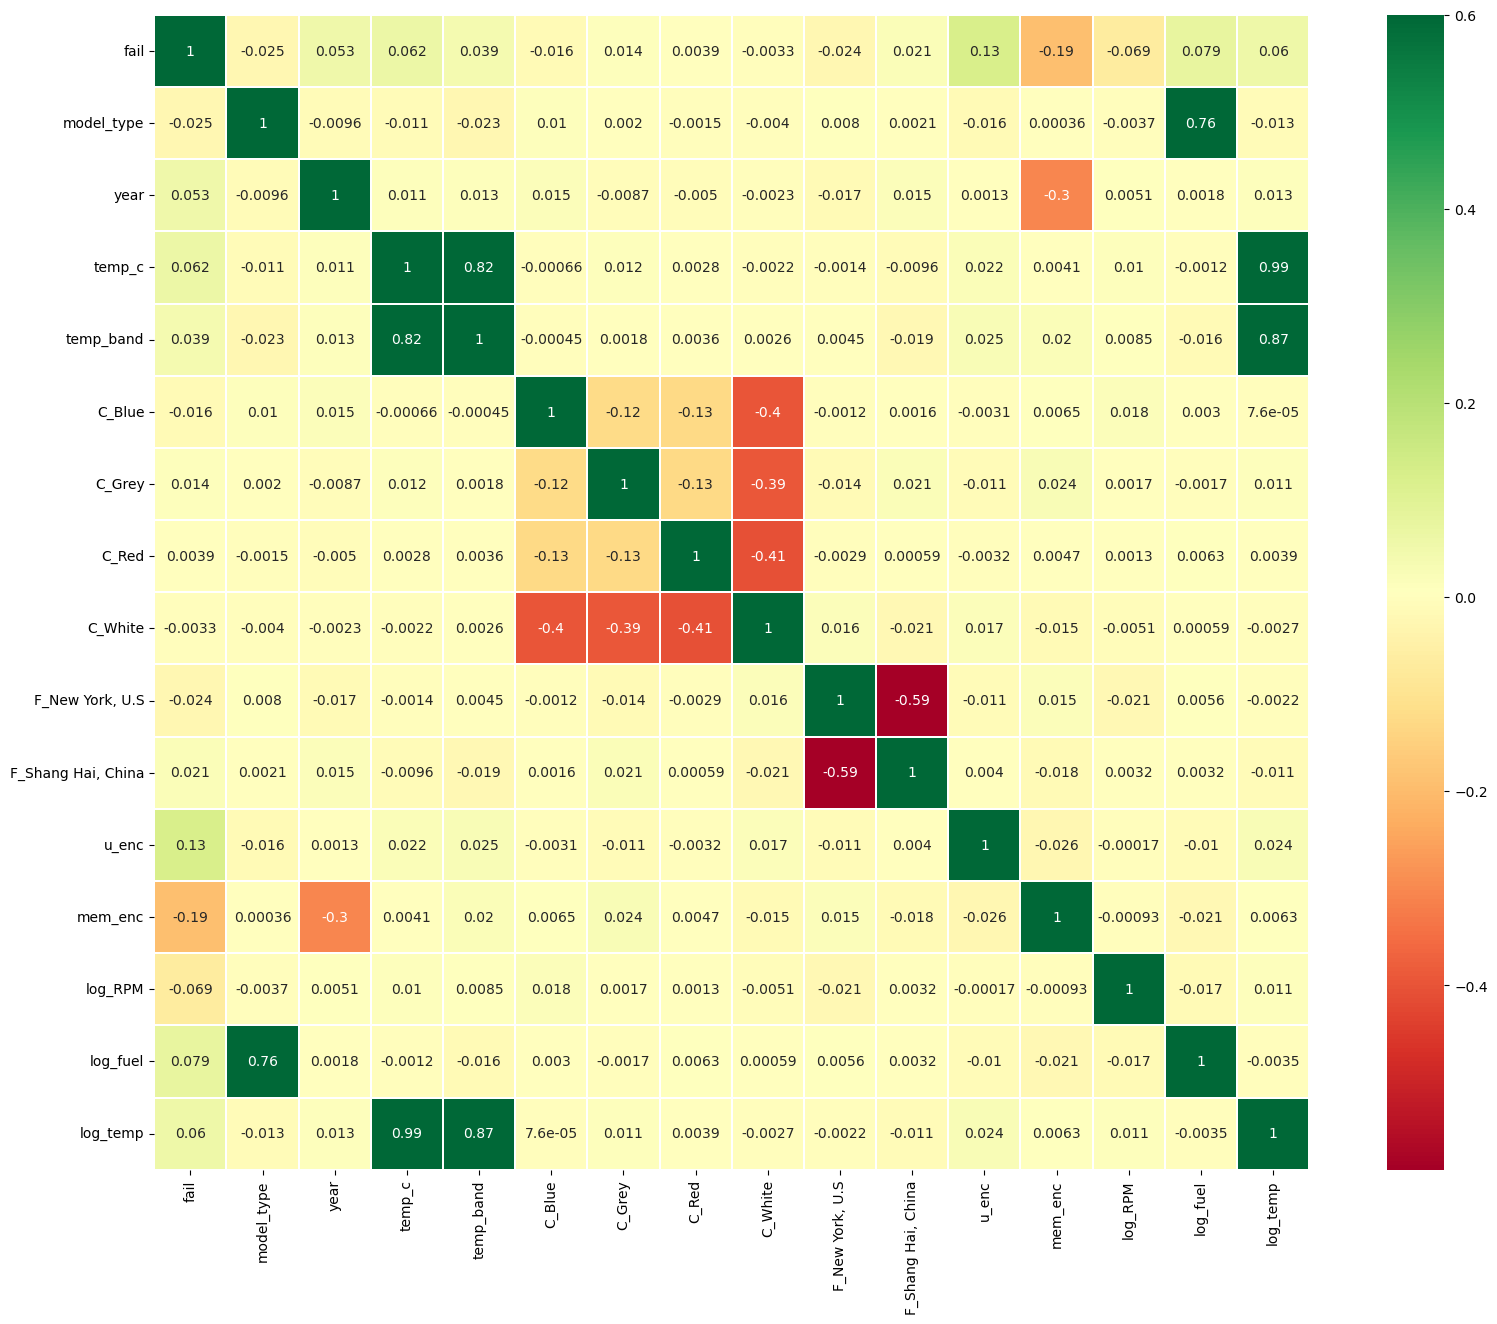

In [518]:
sns.heatmap(df_corr.corr(), vmax=0.6, linewidths=0.2, square=True, annot=True, cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(20,15)

The correlation matrix shows that the encoded variables for Color have negative correlations to each other, which makes sense as they are mutually exclusive of each other. The same applies for encoded variables for Factory. \
There is a strong positive correlation between temp_c and temp_band/log_temp because the latter features are derived from the former. \ 
There is a negative correlation between year and membership as well, and a strong positive correlation between fuel consumption and model. \

# Year VS Membership
The negative correlation between these features is possibly due to cars that have no memberships only appearing after 5 years, which produces more 0s in mem_enc feature over time.

In [519]:
pd.crosstab(df.year,df.mem_enc, margins = True).style.background_gradient(cmap='summer_r')

mem_enc,0.000000,1.000000,2.000000,All
year,,,,
1,0,290,222,512
2,0,458,384,842
3,0,503,416,919
4,0,449,383,832
5,0,491,404,895
6,252,345,212,809
7,264,409,233,906
8,225,349,237,811
9,256,395,234,885


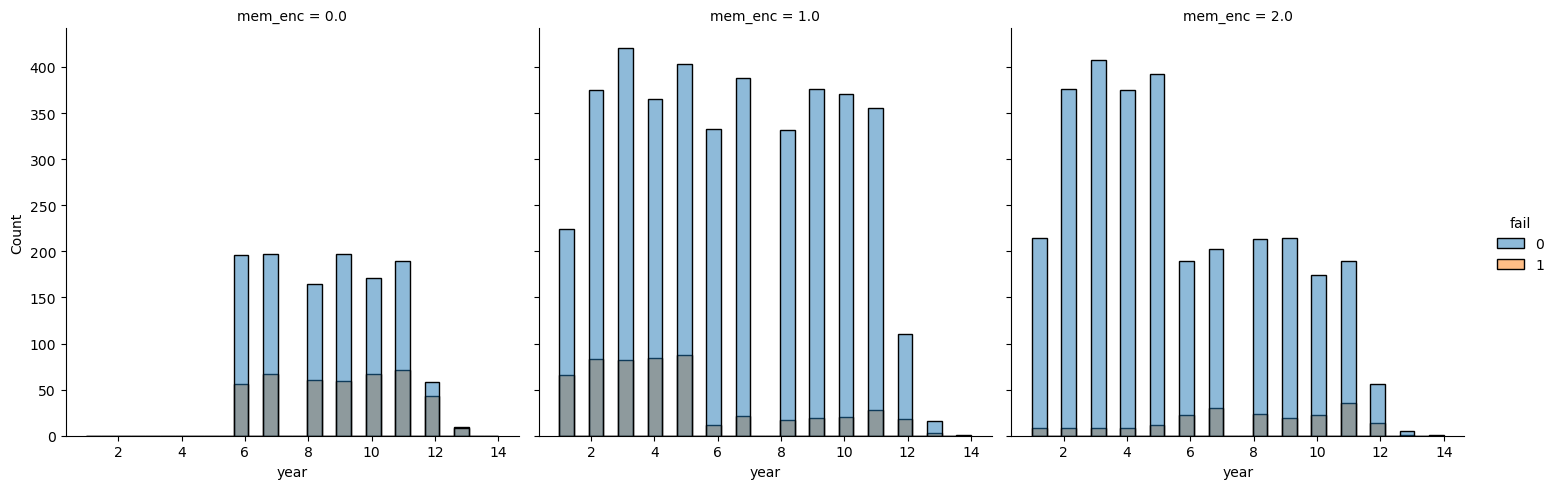

In [520]:
sns.displot(x='year',data=df,hue='fail',col='mem_enc')
plt.show()

As mentioned during the initial feature analysis, cars with normal membership >5 years old and cars with premium membership within the first 5 years of purchase have the lowest risk of encountering failure. Cars with no membership, which by default are >5 years old, have the highest risk.

# Model vs Fuel Consumption
This is a relation that has not been explored during the initial analysis. The correlation matrix shows a strong positive correlation between the two features, meaning that models with higher specifications are likely to be consuming more fuel. 

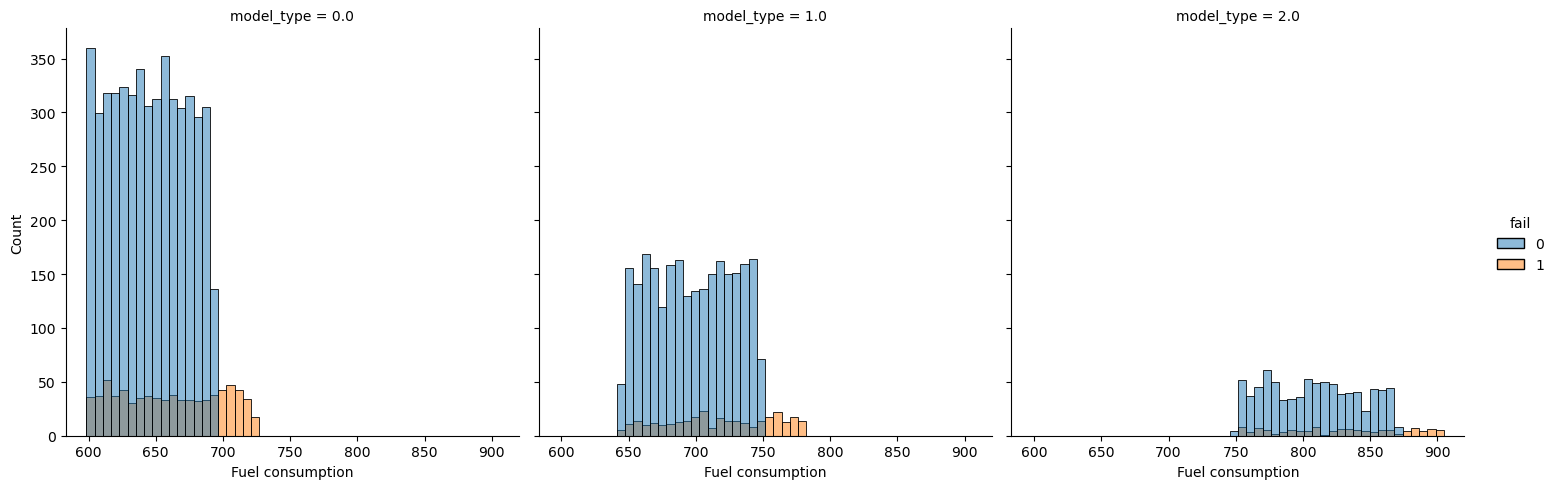

In [521]:
sns.displot(data=df,x='Fuel consumption',col='model_type',hue='fail')

In [522]:
fuel_model3min = df[(df['model_type']==0)]['Fuel consumption'].min()
fuel_model3max = df[(df['model_type']==0)]['Fuel consumption'].max()
fuel_model5min = df[(df['model_type']==1)]['Fuel consumption'].min()
fuel_model5max = df[(df['model_type']==1)]['Fuel consumption'].max()
fuel_model7min = df[(df['model_type']==2)]['Fuel consumption'].min()
fuel_model7max = df[(df['model_type']==2)]['Fuel consumption'].max()
print('Model 3 fuel consumption ranges from '+str(fuel_model3min)+' to '+str(fuel_model3max)+'.')
print('Model 5 fuel consumption ranges from '+str(fuel_model5min)+' to '+str(fuel_model5max)+'.')
print('Model 7 fuel consumption ranges from '+str(fuel_model7min)+' to '+str(fuel_model7max)+'.')

Model 3 fuel consumption ranges from 598.5 to 724.2.
Model 5 fuel consumption ranges from 646.0 to 781.9.
Model 7 fuel consumption ranges from 751.0 to 904.8.


In [523]:
print(df[(df['model_type']==0)&(df['fail']==0)]['Fuel consumption'].max())
print(df[(df['model_type']==1)&(df['fail']==0)]['Fuel consumption'].max())
print(df[(df['model_type']==2)&(df['fail']==0)]['Fuel consumption'].max())

693.0
747.9
868.6


From Model 3 to 5 to 7, it can be seen that the range of fuel consumption that the different models operate at increases, and the fuel consumption threshold of each model as well.\
Model 3 cars are observed to have a 100% fail rate beyond 693.0 l/km. For Model 5, it is above 747.9 l/km. Finally for Model 7 cars, the limit appears to be 868.6 l/km.

# Dropping features
The strong correlation between log_temp and temp_band, and fuel and model suggests possible multicollinearity which might cause complications when running the data in a machine learning model. temp_c is not considered and will be dropped as it was converted to log_temp to reduce the skew in the data distribution. log_temp has a stronger correlation to the target and hence temp_band will be dropped instead. Between log_fuel and model_type, log_fuel has a stronger correlation which might be worth investigating hence model_type will be dropped. 

In [524]:
#Dropping unnecessary features to prepare database for ML models
df_ML = df.drop(columns=['RPM','Usage','Fuel consumption','Membership','temp_band2','temp_band','temp_c','model_type'])
df_ML.head()

,fail,year,C_Blue,C_Grey,C_Red,C_White,"F_New York, U.S","F_Shang Hai, China",u_enc,mem_enc,log_RPM,log_fuel,log_temp
0,0,1,1,0,0,0,0,1,1.0,1.0,0.313677,-3.358425e-15,-1.942890e-16
1,1,1,0,0,0,0,0,1,1.0,2.0,-0.799045,1.285083e-14,-1.942890e-16
2,0,1,0,1,0,0,0,1,0.0,2.0,-0.048010,1.110223e-15,-1.942890e-16
3,1,1,0,0,0,0,0,0,2.0,2.0,-0.570662,-1.731948e-14,-1.942890e-16
5,0,2,0,0,0,1,0,1,1.0,2.0,-0.641946,8.659740e-15,-1.942890e-16


In [525]:
df_ML.shape

(9449, 13)

In [526]:
df_ML.describe()

,fail,year,C_Blue,C_Grey,C_Red,C_White,"F_New York, U.S","F_Shang Hai, China",u_enc,mem_enc,log_RPM,log_fuel,log_temp
count,9449.000000,9449.000000,9449.000000,9449.000000,9449.000000,9449.000000,9449.000000,9449.000000,9449.000000,9449.000000,9449.000000,9.449000e+03,9.449000e+03
mean,0.125622,6.391047,0.112287,0.109112,0.116309,0.556990,0.212509,0.563340,1.039052,1.170177,0.000002,3.660011e-18,7.293586e-18
std,0.331440,3.210115,0.315736,0.311796,0.320612,0.496768,0.409105,0.495998,0.815064,0.695056,1.000053,1.896540e-14,2.688397e-16
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.189338,-3.741452e-14,-2.498002e-16
25%,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.660025,-1.312839e-14,-1.942890e-16
50%,0.000000,6.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,-0.011608,2.220446e-16,-8.326673e-17
75%,0.000000,9.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,2.000000,0.665945,1.254552e-14,1.110223e-16
max,1.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,3.003057,4.413137e-14,9.436896e-16


In [527]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9449 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   RPM                 9449 non-null   int64   
 1   Usage               9449 non-null   object  
 2   Fuel consumption    9449 non-null   float64 
 3   Membership          9449 non-null   object  
 4   fail                9449 non-null   int64   
 5   model_type          9449 non-null   float64 
 6   year                9449 non-null   int32   
 7   temp_c              9449 non-null   float64 
 8   temp_band2          9449 non-null   category
 9   temp_band           9449 non-null   float64 
 10  C_Blue              9449 non-null   uint8   
 11  C_Grey              9449 non-null   uint8   
 12  C_Red               9449 non-null   uint8   
 13  C_White             9449 non-null   uint8   
 14  F_New York, U.S     9449 non-null   uint8   
 15  F_Shang Hai, China  9449 non-null   ui

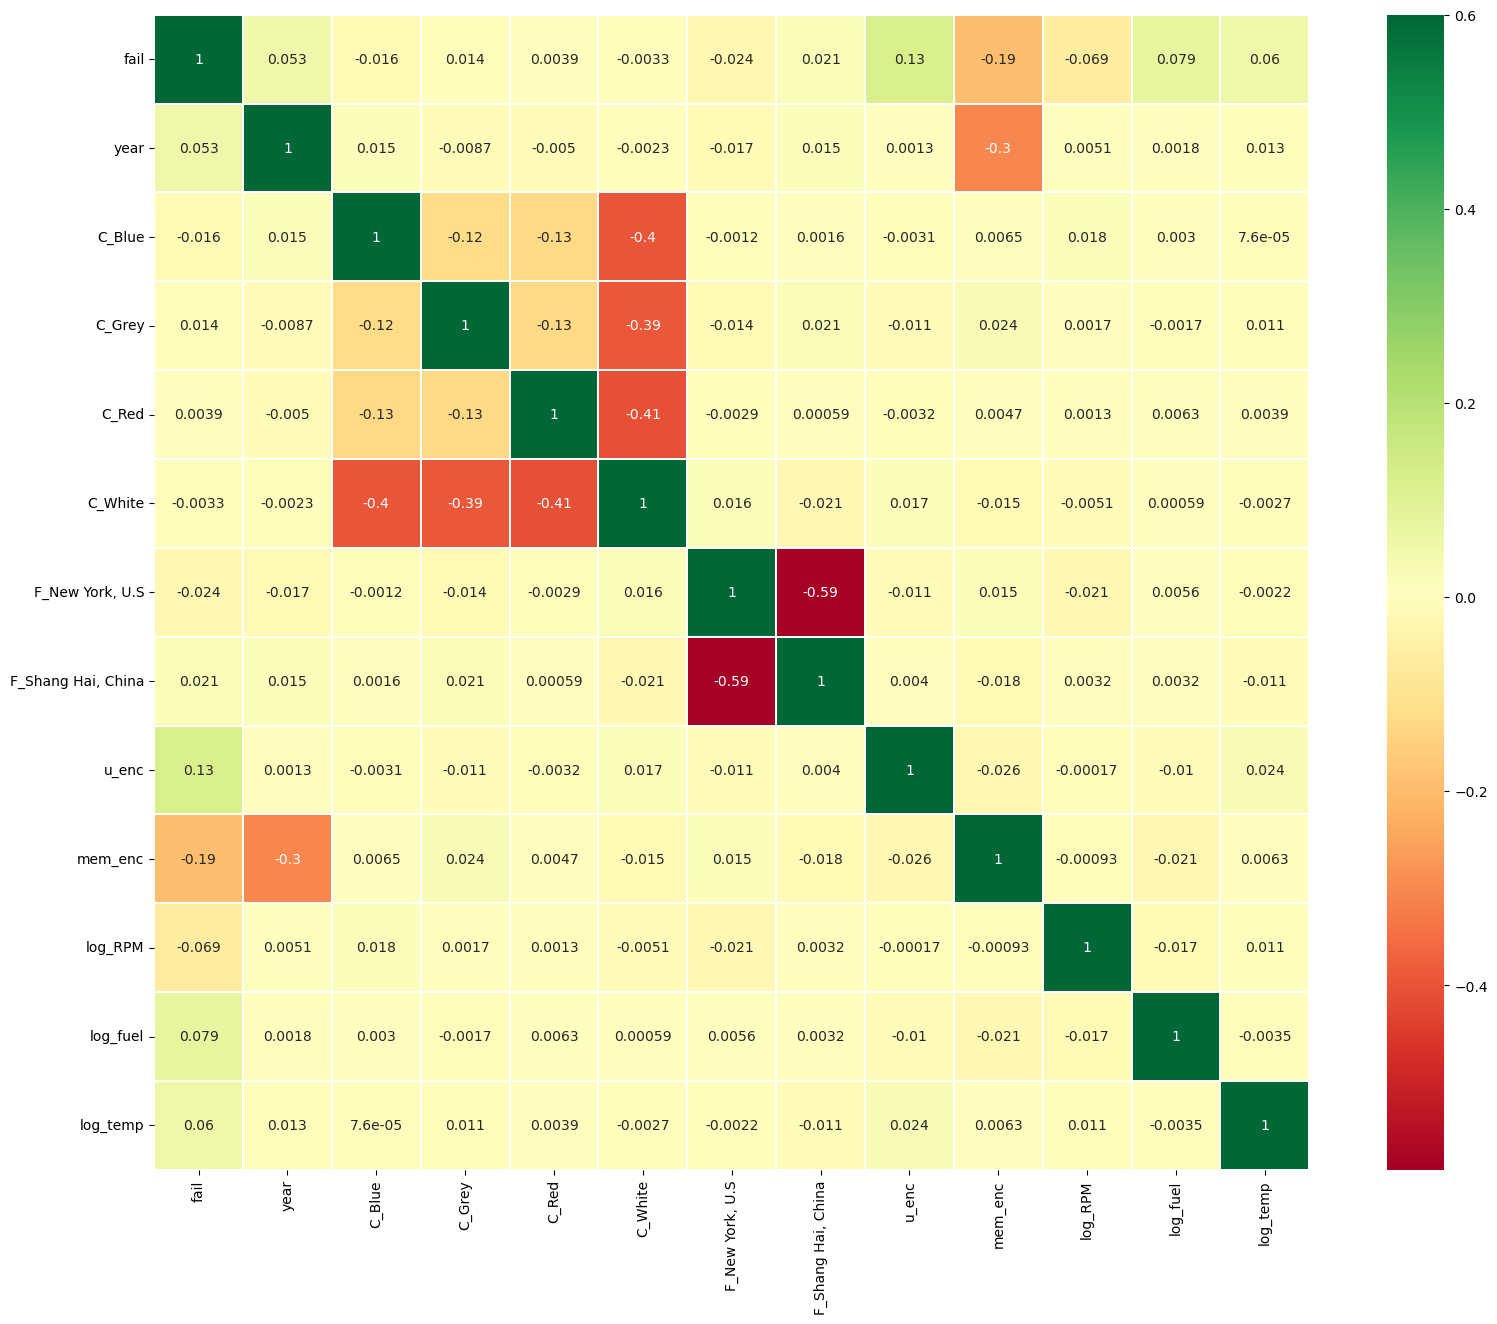

In [528]:
sns.heatmap(df_ML.corr(), vmax=0.6, linewidths=0.2, square=True, annot=True, cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(20,15)

# 6. Machine Learning
The data has been prepared for training and testing in ML Models. We will be using Logistic Regression, Naive Bayes, Neural Networks, Decision Trees, Random Forest and K-Nearest Neighbors. First we will split the data into test and training sets.

In [529]:
X = df_ML.drop('fail', axis=1)
y = df_ML['fail']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
best_models = []
best_scores = []
best_params = []

GridSearchCV will be used to train the ML models used, cross validate and tune the hyperparameters of each model.
They will be tuned towards recall, as we are seeking to predict the occurence of car failure. Hence it is more important to minimize false negatives, meaning cars actually that encounter failure but are predicted not to.

# a. Logistic Regression

In [530]:
logistic_grid = {'C': [0.001, 0.01, 0.1, 1, 10], 
                 'penalty': ['l2']
                }
grid_search = GridSearchCV(LogisticRegression(), logistic_grid, cv=5, scoring='recall', refit=True, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_models.append(grid_search.best_estimator_)
best_scores.append(grid_search.best_score_)
best_params.append(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)

0.001226993865030675
LogisticRegression(C=0.1)


# b. Naive Bayes

In [531]:
    nb_grid = {'alpha': [0.1, 0.5, 1.0], 
               'fit_prior': [True, False]
              }
    grid_search = GridSearchCV(BernoulliNB(), nb_grid, cv=5, scoring='recall', refit=True, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models.append(grid_search.best_estimator_)
    best_scores.append(grid_search.best_score_)
    best_params.append(grid_search.best_params_)
    print(grid_search.best_score_)
    print(grid_search.best_estimator_)

0.6244717109747785
BernoulliNB(alpha=0.1, fit_prior=False)


# c. Neural Networks

In [532]:
    nn_grid = {'hidden_layer_sizes': [(50,50,50), (100,100,100), (100,100)],
                 'activation': ['relu', 'tanh'],
                 'solver': ['adam'],
                 'learning_rate': ['constant','adaptive'],
                 'learning_rate_init': [0.001, 0.01, 0.1, 1],
                 'alpha':[0.0001,0.001]
                }
    grid_search = GridSearchCV(MLPClassifier(), nn_grid, cv=5, scoring='recall', refit=True, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models.append(grid_search.best_estimator_)
    best_scores.append(grid_search.best_score_)
    best_params.append(grid_search.best_params_)
    print(grid_search.best_score_)
    print(grid_search.best_estimator_)

0.4
MLPClassifier(activation='tanh', hidden_layer_sizes=(100, 100, 100),
              learning_rate='adaptive', learning_rate_init=1)


# d. Decision Trees

In [533]:
    tree_grid = {'max_depth': [5, 10, 20, 30, 40, 50], 
                 'min_samples_leaf': [1, 2, 3, 4, 5]
                }
    grid_search = GridSearchCV(DecisionTreeClassifier(), tree_grid, cv=5, scoring='recall', refit=True, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models.append(grid_search.best_estimator_)
    best_scores.append(grid_search.best_score_)
    best_params.append(grid_search.best_params_)
    print(grid_search.best_score_)
    print(grid_search.best_estimator_)

0.2536696205407861
DecisionTreeClassifier(max_depth=50)


# e. Random Forest

In [534]:
    forest_grid = {'n_estimators': [10, 20, 30, 40, 50], 
                   'max_depth': [5, 10, 20, 30, 40, 50], 
                   'min_samples_leaf': [1, 2, 3, 4, 5]
                  }
    grid_search = GridSearchCV(RandomForestClassifier(), forest_grid, cv=5, scoring='recall', refit=True, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models.append(grid_search.best_estimator_)
    best_scores.append(grid_search.best_score_)
    best_params.append(grid_search.best_params_)
    print(grid_search.best_score_)
    print(grid_search.best_estimator_)

0.13918806331894265
RandomForestClassifier(max_depth=50, n_estimators=20)


# f. K-Nearest Neighbors

In [535]:
    knn_grid = {'n_neighbors': [3, 5, 7, 9, 11], 
                'weights': ['uniform', 'distance']
               }
    grid_search = GridSearchCV(KNeighborsClassifier(), knn_grid, cv=5, scoring='recall', refit=True, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models.append(grid_search.best_estimator_)
    best_scores.append(grid_search.best_score_)
    best_params.append(grid_search.best_params_)
    print(grid_search.best_score_)
    print(grid_search.best_estimator_)

0.16871165644171776
KNeighborsClassifier(n_neighbors=3, weights='distance')


# 7. Model Choosing and Evaluation

In [536]:
best_models_series = pd.Series(best_models, name='model')
best_scores_series =  pd.Series(best_scores, name='score')
best_params_series = pd.Series(best_params,name='parameters')
grid_best=pd.concat([best_models_series,best_scores_series,best_params_series], axis=1)
grid_best

,model,score,parameters
0,LogisticRegression(C=0.1),0.001227,"{'C': 0.1, 'penalty': 'l2'}"
1,"BernoulliNB(alpha=0.1, fit_prior=False)",0.624472,"{'alpha': 0.1, 'fit_prior': False}"
2,"MLPClassifier(activation='tanh', hidden_layer_...",0.400000,"{'activation': 'tanh', 'alpha': 0.0001, 'hidde..."
3,DecisionTreeClassifier(max_depth=50),0.253670,"{'max_depth': 50, 'min_samples_leaf': 1}"
4,"(DecisionTreeClassifier(max_depth=50, max_feat...",0.139188,"{'max_depth': 50, 'min_samples_leaf': 1, 'n_es..."
5,"KNeighborsClassifier(n_neighbors=3, weights='d...",0.168712,"{'n_neighbors': 3, 'weights': 'distance'}"


In [537]:
best_index=best_scores.index(max(best_scores))
print('Best Model: {}'.format(best_models[best_index]))
print('Parameters: {}'.format(best_params[best_index]))
print('Score: {}'.format(best_scores[best_index]))

Best Model: BernoulliNB(alpha=0.1, fit_prior=False)
Parameters: {'alpha': 0.1, 'fit_prior': False}
Score: 0.6244717109747785


The Naive Bayes model appears to be the best performing model with the above parameters shown. Let's verify this data with the confusion matrix.

# Confusion Matrix and Model Evaluation

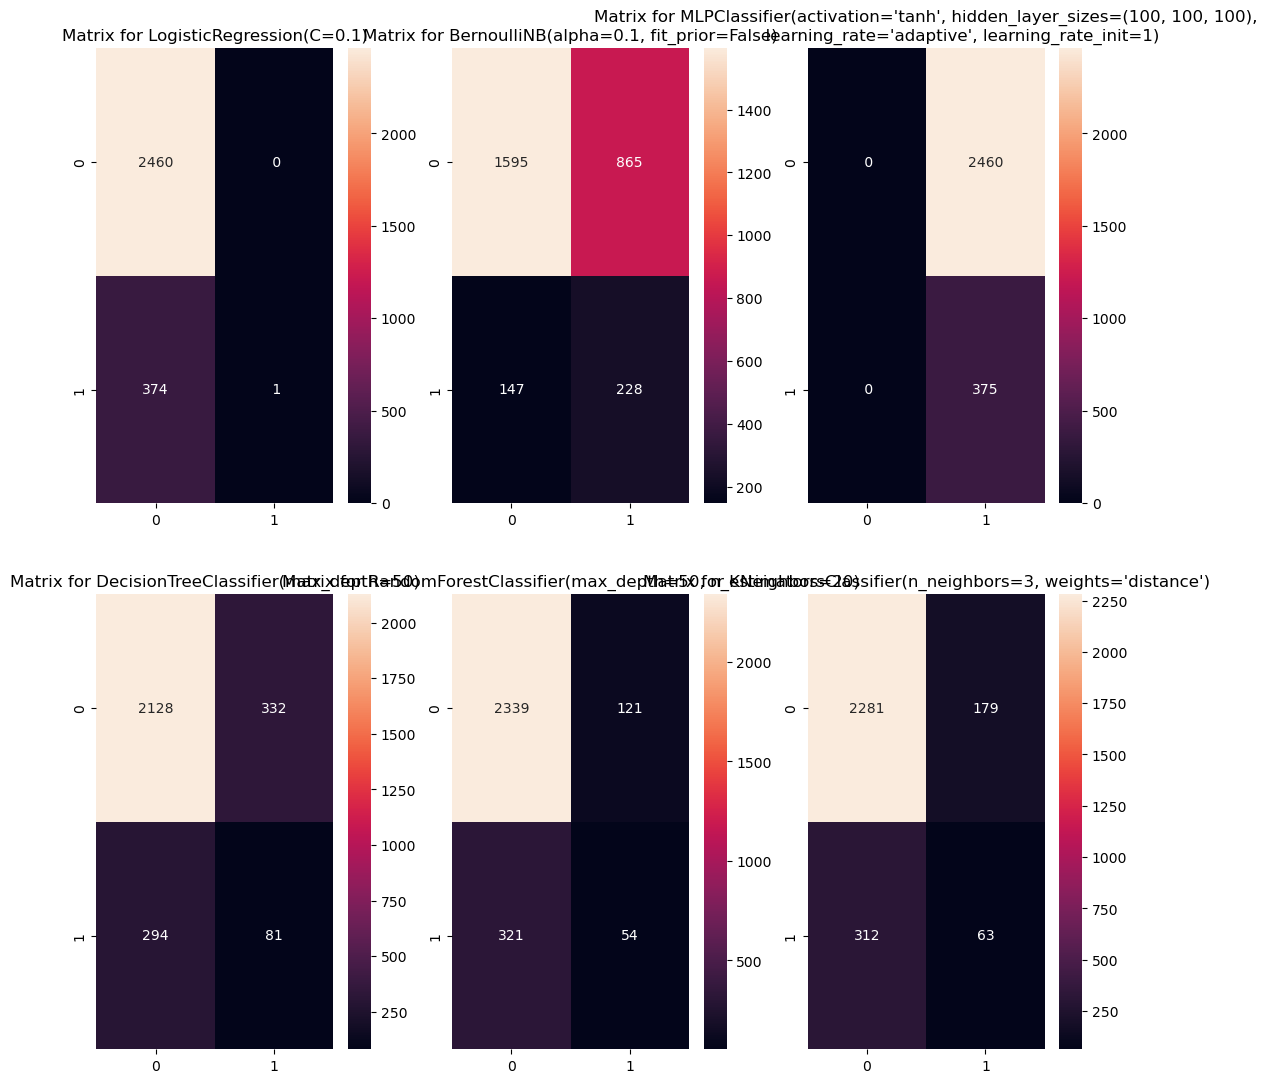

In [538]:
    from sklearn.metrics import confusion_matrix
    f,ax=plt.subplots(2,3,figsize=(13,13))
    # Evaluate model
    i = 0
    j = 0
    for model in best_models:
        y_pred = model.predict(X_test)
        sns.heatmap(confusion_matrix(y_test,y_pred),ax=ax[i,j],annot=True,fmt='2.0f')
        ax[i,j].set_title('Matrix for {}'.format(model))
        j +=1
        if j >2:
            i += 1
            j = 0
    

The Naive Bayes model does indeed produce the best recall amongst the 6 ML models, with the fewest false negatives.\
This means there are fewer cars predicted as not failing when they have actually encountered failure. However, at a rate of 60.8%, the model can be further improved on via other methods, such as ensembling or further transforming the data.

# Feature Importance

In [539]:
from sklearn.inspection import permutation_importance

# model training
bn_clf = best_models[best_index]
bn_clf.fit(X_train, y_train)

# compute the permutation importance
result = permutation_importance(bn_clf, X_test, y_test, n_repeats=10, random_state=0)

importances = []
# print the feature importance
for i in range(X_test.shape[1]):
    importances.append(result.importances[i].mean())
features = pd.Series(X_test.columns, name='features')
impt_s = pd.Series(importances, name='importances')
feat_impt =  pd.concat([features,impt_s], axis=1)
feat_impt

,features,importances
0,year,0.000000
1,C_Blue,0.000388
2,C_Grey,0.002116
3,C_Red,0.003139
4,C_White,0.010582
5,"F_New York, U.S",0.008677
6,"F_Shang Hai, China",0.008466
7,u_enc,0.012628
8,mem_enc,0.034674
9,log_RPM,0.005326


Text(0.5, 1.0, 'Feature Importance Comparison')

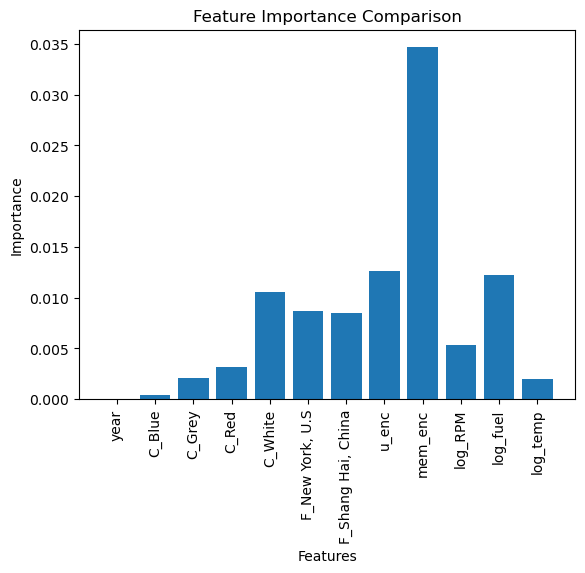

In [540]:
plt.bar(features,impt_s)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation='vertical')
plt.title('Feature Importance Comparison')

Membership(mem_enc) appears to have the highest importance among the features, followed by Usage(u_enc) and Fuel consumption(log_fuel). The level of membership subscription gives drivers access to different frequency of servicing, hence it makes sense that more servicing would prevent cars from encountering failure. \
Higher usage of cars would naturally give rise to wear and tear as well, and perhaps higher fuel consumption would contribute to wear and tear of the cars' engines.\
The lowest importance belongs to the age of the car, which is surprising given that it would make sense that older cars are more susceptible to failure. However as shown in the initial data exploration, the increasing trend over the years is not significant compared to other features.

# 8. Summary
Through the exploratory data analysis, we have visualized and understood the relations between each feature and the occurence of car failure, and along the way found relations between the features as well. We identified erroneous and null data, taking measures to rectify these issues to clean the data.\
\
To prepare the data for training Machine Learning models, we encoded categorical and ordinal features, and transformed the continuous data to better suit the models, some of which assume normal distribution.\
\
Through training the models, tuning the hyperparameters and doing cross validation with GridSearchCV, we found that the Naive Bayes model provided the best recall and confirmed it with test data. The confusion matrix showed that it did indeed produce the fewest false negatives, which is ideal for predicting car failure. Feature importance comparison showed us that Membership appears to be the most important feature for our highest scoring Naives Bayes model.\
\
For things to improve on for this exploratory data analysis and ML model testing, it would be good to dive deeper and compare the relations between the features and each failure type, instead of just car failure as a whole. This might give better insights into which features may be affecting which failure type more. Also as explained above, given the chance the ML model may be further improved on via other methods such as ensembling, or more exploration can be done on other ML models which may be more suitable for this dataset.